# 1. Introduction

Trong thời đại thương mại điện tử phát triển mạnh mẽ, việc **giữ chân khách hàng (Customer Retention)** đóng vai trò then chốt trong chiến lược kinh doanh của các doanh nghiệp. Chi phí để thu hút một khách hàng mới thường cao gấp nhiều lần so với việc duy trì khách hàng hiện tại, vì vậy khả năng **dự đoán khách hàng có rời bỏ dịch vụ hay không (Customer Churn Prediction)** trở thành một bài toán quan trọng.

Dataset được sử dụng trong đồ án này là **E-Commerce Dataset,** bao gồm thông tin của hơn 5.000 khách hàng cùng với các đặc điểm liên quan đến hành vi tiêu dùng, thói quen mua sắm, hình thức thanh toán, thời gian sử dụng ứng dụng, và mức độ hài lòng của họ. Biến mục tiêu trong bài toán là `Churn`, thể hiện việc khách hàng có tiếp tục sử dụng dịch vụ hay đã ngừng tương tác.

# 2. Features

| Cột| Mô tả ngắn gọn |
|:----|:-----|
| **CustomerID** | Mã định danh duy nhất của khách hàng |
| **Churn** | Biến mục tiêu – khách hàng có rời bỏ dịch vụ hay không |
| **Tenure** | Thời gian (tháng) khách hàng đã gắn bó với công ty |
| **PreferredLoginDevice** | Thiết bị mà khách hàng hay đăng nhập nhất (Mobile, Computer, ...) |
| **CityTier** | Mức độ phát triển của thành phố nơi khách hàng sống (1: Lớn, 3: nhỏ) |
| **WarehouseToHome** | Khoảng cách (km) từ kho hàng đến nhà khách hàng |
| **PreferredPaymentMode** | Phương thức thanh toán yêu thích (Credit Card, COD, ...) |
| **Gender** | Giới tính của khách hàng |
| **HourSpendOnApp** | Thời gian trung bình mỗi ngày khách hàng dùng app (giờ) |
| **NumberOfDeviceRegistered** |Số thiết bị khách hàng đã đăng ký |
| **PreferredOrderCat** |Danh mục sản phẩm thường mua (Laptop, Fashion, Grocery, ...) |
| **SatisfactionScore** | Mức độ hài lòng của khách hàng |
| **MaritalStatus** | Tình trạng hôn nhân (Single, Married, Divorced, ...) |
| **NumberOfAddress** | Số lượng địa chỉ giao hàng đã lưu |
| **Complain** |  Khách hàng có từng gửi khiếu nại hay không |
| **OrderAmountHikeFromLastYear** | Tỷ lệ tăng số tiền đặt hàng so với năm trước (%) |
| **CouponUsed** | Số lượng phiếu giảm giá khách hàng đã sử dụng |
| **OrderCount** | Tổng số đơn hàng của khách hàng |
| **DaySinceLastOrder** | Số ngày kể từ lần đặt hàng gần nhất |
| **CashbackAmount** | Tổng giá trị hoàn tiền (cashback) khách hàng đã nhận được |



# 3. Goal

Xây dựng một mô hình dự đoán có thể xác định chính xác những khách hàng có nguy cơ rời bỏ công ty (`churn`) dựa trên các biến được cung cấp. Điều này có thể giúp công ty chủ động thực hiện các bước để giữ chân những khách hàng này và giảm tỷ lệ `churn`.

Thực hiện phân tích thăm dò kỹ lưỡng dữ liệu khách hàng được cung cấp để hiểu rõ hơn về hành vi và đặc điểm của khách hàng. Điều này bao gồm việc phân tích các mô hình và xu hướng của các biến. Phân tích này có thể giúp công ty hiểu rõ hơn về khách hàng của mình và cung cấp thông tin cho việc ra quyết định trong tương lai.

# 4. Data Loading & Inspection

In [1]:
# Tải file dữ liệu về
%pip install gdown
import gdown

# Download file từ Google Drive
file_id = '1GXgzp6KcrsjJZ4rwXVnQIpCp-ATxn-7g'
output = 'E Commerce Dataset.xlsx'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Downloading...
From: https://drive.google.com/uc?id=1GXgzp6KcrsjJZ4rwXVnQIpCp-ATxn-7g
To: c:\Users\ASUS\Downloads\E Commerce Dataset.xlsx
100%|██████████| 556k/556k [00:00<00:00, 2.71MB/s]



'E Commerce Dataset.xlsx'

In [2]:
# Download file từ Google Drive
file_id = '1cN-Vz4nMtBIBhkv4if1rTknr3376onyu'
output = 'requirements.txt'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1cN-Vz4nMtBIBhkv4if1rTknr3376onyu
To: c:\Users\ASUS\Downloads\requirements.txt
100%|██████████| 270/270 [00:00<00:00, 357kB/s]



'requirements.txt'

In [3]:
%pip install -r requirements_colab_py312.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import tất cả thư viện cần dùng
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, ConfusionMatrixDisplay, RocCurveDisplay,
    PrecisionRecallDisplay, precision_recall_curve, average_precision_score
)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# %matplotlib inline giúp hiển thị đồ thị ngay trong notebook
%matplotlib inline

**Tiếp theo:**

- Định nghĩa các Custom Transformers để tránh Data Leakage
- Các transformer này sẽ FIT trên training data và TRANSFORM cả train & test

In [5]:
class OutlierClipper(BaseEstimator, TransformerMixin):
    """
    Transformer để clip outliers dựa trên IQR.
    CHỈ tính IQR từ training data để tránh data leakage.
    """
    def __init__(self, columns=None, factor=1.5):
        self.columns = columns
        self.factor = factor
        self.bounds_ = {}
    
    def fit(self, X, y=None):
        X_df = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
        cols = self.columns if self.columns else X_df.select_dtypes(include=[np.number]).columns
        
        for col in cols:
            if col in X_df.columns:
                Q1 = X_df[col].quantile(0.25)
                Q3 = X_df[col].quantile(0.75)
                IQR = Q3 - Q1
                self.bounds_[col] = (Q1 - self.factor * IQR, Q3 + self.factor * IQR)
        return self
    
    def transform(self, X):
        X_df = pd.DataFrame(X).copy() if not isinstance(X, pd.DataFrame) else X.copy()
        for col, (lower, upper) in self.bounds_.items():
            if col in X_df.columns:
                X_df[col] = X_df[col].clip(lower=lower, upper=upper)
        return X_df


In [6]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    """
    Transformer để tạo các feature mới.
    Không cần fit vì chỉ tạo features từ các cột hiện có.
    - Xử lý division by zero an toàn
    - Kiểm tra và xử lý NaN/Inf sau khi tạo features
    """
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def _safe_divide(self, numerator, denominator, fill_value=0):
        """Chia an toàn, trả về fill_value khi denominator <= 0"""
        result = np.where(denominator > 0, numerator / denominator, fill_value)
        return result
    
    def transform(self, X):
        X_df = pd.DataFrame(X).copy() if not isinstance(X, pd.DataFrame) else X.copy()
        
        # Tạo các feature mới với division an toàn
        # avg_cashbk_per_order: nếu OrderCount = 0, trả về CashbackAmount (chưa có đơn nào)
        X_df['avg_cashbk_per_order'] = self._safe_divide(
            X_df['CashbackAmount'], X_df['OrderCount'], fill_value=X_df['CashbackAmount']
        )
        
        # order_frequency_mpm: nếu Tenure = 0 (khách mới), trả về OrderCount
        X_df['order_frequency_mpm'] = self._safe_divide(
            X_df['OrderCount'], X_df['Tenure'], fill_value=X_df['OrderCount']
        )
        
        # coupon_rate: nếu OrderCount = 0, trả về 0
        X_df['coupon_rate'] = self._safe_divide(
            X_df['CouponUsed'], X_df['OrderCount'], fill_value=0
        )
        
        # Các features khác
        X_df['engagement_score'] = X_df['HourSpendOnApp'] * np.log1p(X_df['NumberOfDeviceRegistered'])
        X_df['growth_x_freq'] = X_df['OrderAmountHikeFromlastYear'] * X_df['order_frequency_mpm']
        X_df['satis_x_complain'] = X_df['SatisfactionScore'] * (1 - X_df['Complain'].astype(int))
        X_df['city_is_tier1'] = (X_df['CityTier'] == '1').astype(int)
        X_df['multi_address'] = (X_df['NumberOfAddress'] > 1).astype(int)
        
        # Log-transform (np.log1p an toàn với giá trị >= 0)
        for col in ['OrderCount', 'CashbackAmount', 'WarehouseToHome', 'DaySinceLastOrder']:
            if col in X_df.columns:
                # Clip giá trị âm về 0 trước khi log transform
                X_df[f'log_{col}'] = np.log1p(np.maximum(X_df[col], 0))
        
        # Kiểm tra và xử lý NaN/Inf
        numeric_cols = X_df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            # Replace inf với NaN, sau đó fill NaN bằng 0
            X_df[col] = X_df[col].replace([np.inf, -np.inf], np.nan)
            if X_df[col].isna().any():
                X_df[col] = X_df[col].fillna(0)
        
        return X_df

In [7]:
class SafeLabelEncoder(BaseEstimator, TransformerMixin):
    """
    LabelEncoder an toàn - xử lý unseen labels trong test set.
    """
    def __init__(self, columns=None):
        self.columns = columns
        self.encoders_ = {}
        self.unknown_value_ = {}
    
    def fit(self, X, y=None):
        X_df = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
        cols = self.columns if self.columns else X_df.select_dtypes(include=['object']).columns.tolist()
        
        for col in cols:
            if col in X_df.columns:
                le = LabelEncoder()
                le.fit(X_df[col].astype(str))
                self.encoders_[col] = le
                # Unknown value = max + 1
                self.unknown_value_[col] = len(le.classes_)
        return self
    
    def transform(self, X):
        X_df = pd.DataFrame(X).copy() if not isinstance(X, pd.DataFrame) else X.copy()
        
        for col, le in self.encoders_.items():
            if col in X_df.columns:
                # Xử lý unseen labels
                X_df[col] = X_df[col].astype(str).apply(
                    lambda x: le.transform([x])[0] if x in le.classes_ else self.unknown_value_[col]
                )
        return X_df

Đã định nghĩa các Custom Transformers để tránh Data Leakage:
  - OutlierClipper: Clip outliers dựa trên IQR (fit trên train)
  - FeatureEngineer: Tạo các feature mới
  - SafeLabelEncoder: Encode categorical (xử lý unseen labels)

In [8]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## 4.1. Understanding the dataset

In [9]:
df.shape

(5630, 20)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [12]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

- Từ tập dữ liệu sơ bộ, chúng ta có thể thấy một số giá trị bị thiếu. Không có mục nào trùng lặp.

- Có 5630 hàng và 20 cột.

- Nhìn vào Kiểu dữ liệu, có vẻ như không có bất kỳ sự bất thường nào trong các giá trị trong tập dữ liệu.

In [13]:
# Xem số lượng giá trị của từng biến phân loại
for col in df.columns:
    if df[col].dtypes == 'object':
        print(f"{col}:")
        print(df[col].value_counts())
        print()

PreferredLoginDevice:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

PreferredPaymentMode:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

Gender:
Gender
Male      3384
Female    2246
Name: count, dtype: int64

PreferedOrderCat:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

MaritalStatus:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64



In [14]:
# Vì 'mobile phone' và 'phone' giống nhau nên gộp lại thành 1.
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [15]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

In [16]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

In [17]:
# Vì 'COD' cũng là 'Cash on Delivery' nên gộp lại thành 1
# Vì 'CC' cũng là 'Credit Card' nên gộp lại thành 1

df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [18]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

## 4.2. Handling the Missing Values

In [19]:
# Xóa cột CustomerID
df.drop(['CustomerID'],axis=1, inplace=True)

In [20]:
# In ra những cột bị thiếu dữ liệu
print("Các cột có giá trị null:")
print("-" * 50)
null_count = 0
for col in df.columns:
    null_sum = df[col].isnull().sum()
    if null_sum > 0:
        null_count += 1
        print(f"{col}:")
        print(f"  - Số null: {null_sum}")
        print(f"  - Tỷ lệ: {null_sum/len(df)*100:.2f}%")
        print(f"  - Kiểu dữ liệu: {df[col].dtypes}")
        print()

if null_count == 0:
    print("Không có cột nào bị thiếu dữ liệu!")
else:
    print(f"Tổng: {null_count} cột có giá trị null")

Các cột có giá trị null:
--------------------------------------------------
Tenure:
  - Số null: 264
  - Tỷ lệ: 4.69%
  - Kiểu dữ liệu: float64

WarehouseToHome:
  - Số null: 251
  - Tỷ lệ: 4.46%
  - Kiểu dữ liệu: float64

HourSpendOnApp:
  - Số null: 255
  - Tỷ lệ: 4.53%
  - Kiểu dữ liệu: float64

OrderAmountHikeFromlastYear:
  - Số null: 265
  - Tỷ lệ: 4.71%
  - Kiểu dữ liệu: float64

CouponUsed:
  - Số null: 256
  - Tỷ lệ: 4.55%
  - Kiểu dữ liệu: float64

OrderCount:
  - Số null: 258
  - Tỷ lệ: 4.58%
  - Kiểu dữ liệu: float64

DaySinceLastOrder:
  - Số null: 307
  - Tỷ lệ: 5.45%
  - Kiểu dữ liệu: float64

Tổng: 7 cột có giá trị null


In [21]:
# Chuyển đổi biến "Churn" và "CityTier" thành object
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00


**Để tránh data leakage, chúng ta sẽ:**
1. *Chỉ điền missing values cho mục đích EDA* (để visualize)
2. *Lưu lại data gốc (df_raw)* trước khi xử lý
3. *Sau này khi train model*: sẽ dùng Pipeline để fit imputer/scaler CHỈ trên training set


**Điền các giá trị còn thiếu bằng giá trị trung vị cho EDA:**

In [23]:
# Lưu data gốc trước khi xử lí (để tránh data leakage khi train model)
df_raw = df.copy()  # Lưu data gốc với missing values

# Điền giá trị null bằng median chỉ cho mục đích EDA
# (Khi train model, sẽ dùng Pipeline để fit imputer chỉ trên train set)
print("Điền giá trị null bằng median (chỉ cho EDA):")
df_eda = df.copy()
for col in df_eda.columns:
    null_sum = df_eda[col].isnull().sum()
    if null_sum > 0:
        median_val = df_eda[col].median()
        df_eda[col].fillna(median_val, inplace=True)
        print(f"  - {col}: điền {null_sum} giá trị null bằng median = {median_val}")

# Dùng df_eda cho các bước EDA tiếp theo
df = df_eda.copy()

Điền giá trị null bằng median (chỉ cho EDA):
  - Tenure: điền 264 giá trị null bằng median = 9.0
  - WarehouseToHome: điền 251 giá trị null bằng median = 14.0
  - HourSpendOnApp: điền 255 giá trị null bằng median = 3.0
  - OrderAmountHikeFromlastYear: điền 265 giá trị null bằng median = 15.0
  - CouponUsed: điền 256 giá trị null bằng median = 1.0
  - OrderCount: điền 258 giá trị null bằng median = 2.0
  - DaySinceLastOrder: điền 307 giá trị null bằng median = 3.0
  - OrderAmountHikeFromlastYear: điền 265 giá trị null bằng median = 15.0
  - CouponUsed: điền 256 giá trị null bằng median = 1.0
  - OrderCount: điền 258 giá trị null bằng median = 2.0
  - DaySinceLastOrder: điền 307 giá trị null bằng median = 3.0


- Hoàn thành điền giá trị null cho EDA
- Data gốc được lưu trong df_raw để train model sau này

In [24]:
# Xem lại coi còn cột nào bị thiếu dữ liệu nữa không
null_found = False
for i in df.columns:
    if df[i].isnull().sum() > 0:
        null_found = True
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

if not null_found:
    print("Không còn giá trị null nào trong dataset")

Không còn giá trị null nào trong dataset


## 4.3. Outlier Treatment

Bây giờ chúng ta sẽ xử lý các giá trị ngoại lệ. Đối với điều này, chúng ta sẽ xác định khoảng dưới và khoảng trên, cách các râu tương ứng một khoảng bằng 1,5 lần khoảng liên tứ phân vị.

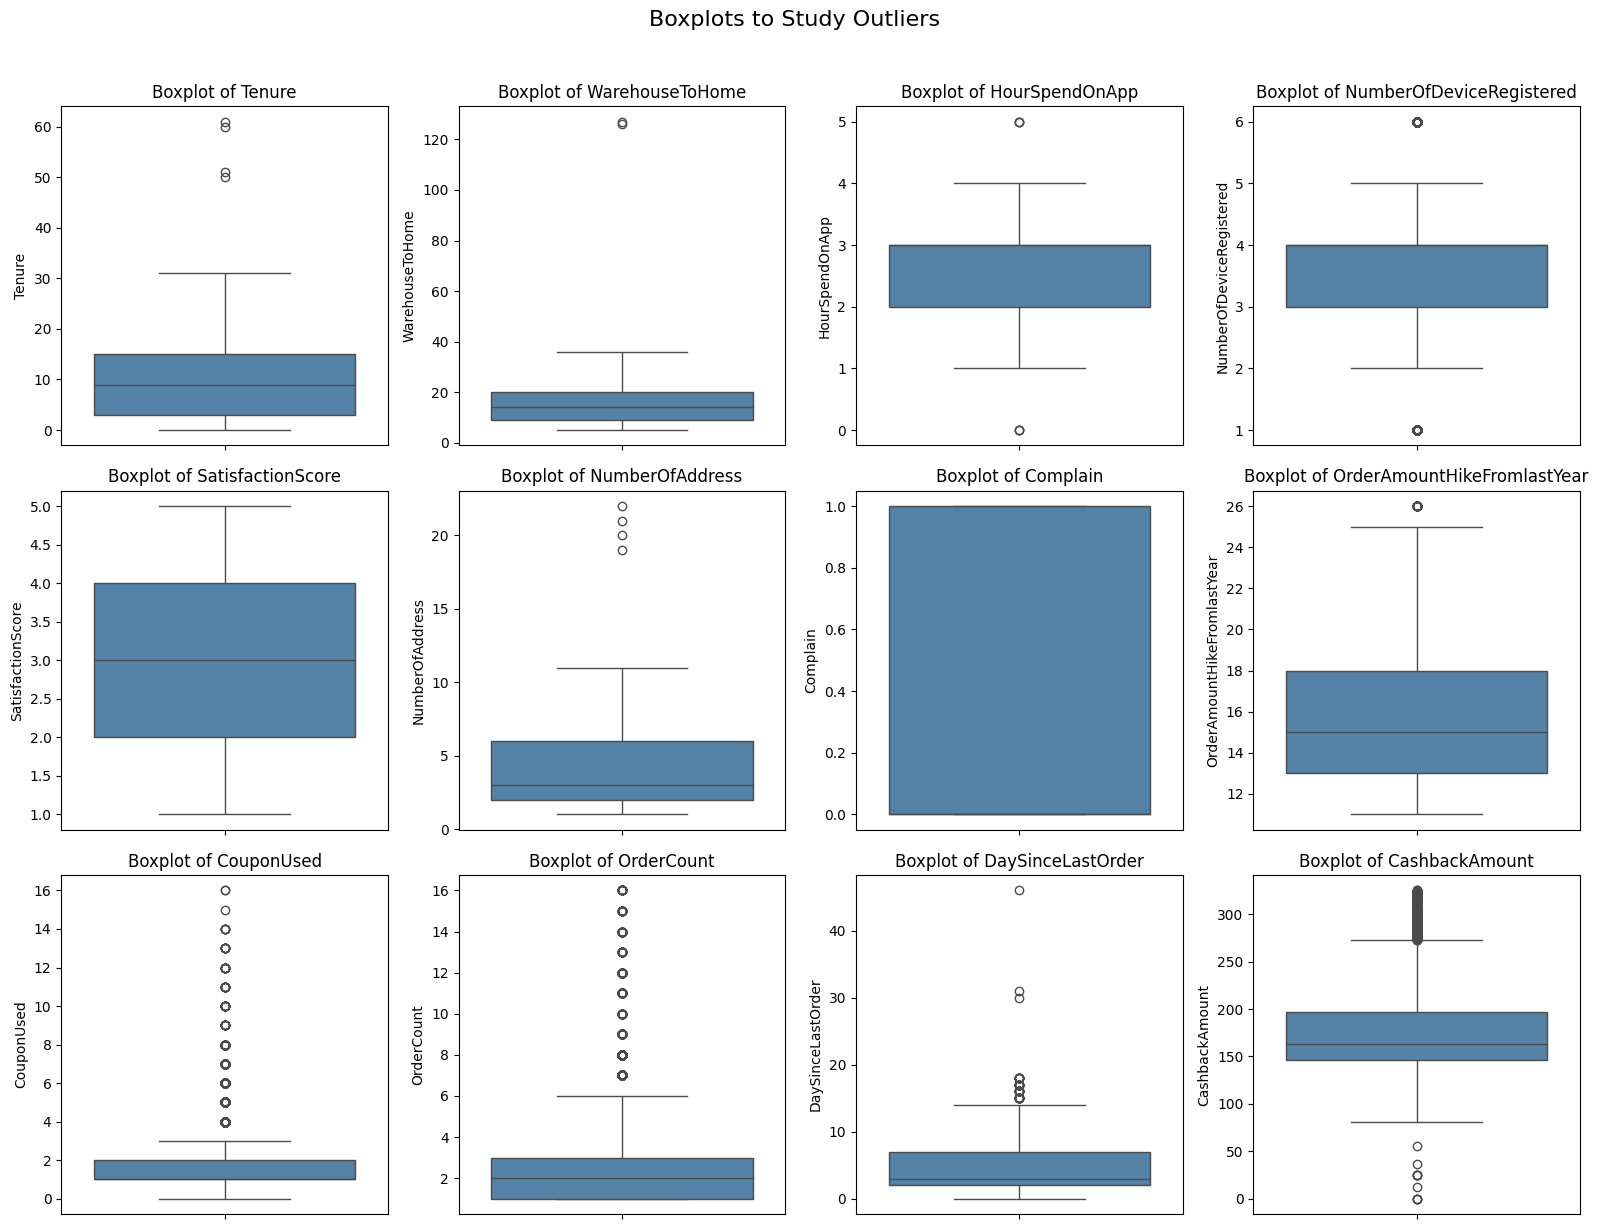

In [25]:
# Lấy các cột numerical để vẽ boxplot
num_cols_plot = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Chia thành nhiều hàng, mỗi hàng 4 biến
n_cols = 4
n_rows = (len(num_cols_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(num_cols_plot):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'Boxplot of {col}', fontsize=12)
    axes[idx].set_ylabel(col)

# Ẩn các subplot thừa
for idx in range(len(num_cols_plot), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Boxplots to Study Outliers', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [27]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [28]:
# Chỉ xử lý outlier cho các biến có thể là lỗi nhập liệu hoặc ảnh hưởng xấu đến linear models
# Tree-based models thường không cần xử lý outlier nhiều

# Các biến CẦN xử lý outlier (có thể là lỗi hoặc quá extreme)
cols_to_clip = ['WarehouseToHome', 'Tenure', 'CashbackAmount']

# Các biến không nên xử lý outlier mạnh (chứa thông tin hành vi quan trọng)
# - OrderCount, DaySinceLastOrder: outlier cho biết khách hàng đặc biệt (rất trung thành hoặc bỏ bê)
# - NumberOfAddress: outlier có thể là tín hiệu churn quan trọng

print(" Xử lý outlier:")
print(f"   Các cột được clip: {cols_to_clip}")
print("   Các cột KHÔNG xử lý: OrderCount, DaySinceLastOrder, NumberOfAddress (chứa dữ liệu quan trọng)")

for column in cols_to_clip:
    if column in df.columns and df[column].dtype != 'object':
        lr, ur = remove_outlier(df[column])
        original_outliers = ((df[column] > ur) | (df[column] < lr)).sum()
        df[column] = np.where(df[column] > ur, ur, df[column])
        df[column] = np.where(df[column] < lr, lr, df[column])
        print(f"   - {column}: đã clip {original_outliers} outliers")

 Xử lý outlier:
   Các cột được clip: ['WarehouseToHome', 'Tenure', 'CashbackAmount']
   Các cột KHÔNG xử lý: OrderCount, DaySinceLastOrder, NumberOfAddress (chứa dữ liệu quan trọng)
   - WarehouseToHome: đã clip 2 outliers
   - Tenure: đã clip 4 outliers
   - CashbackAmount: đã clip 438 outliers


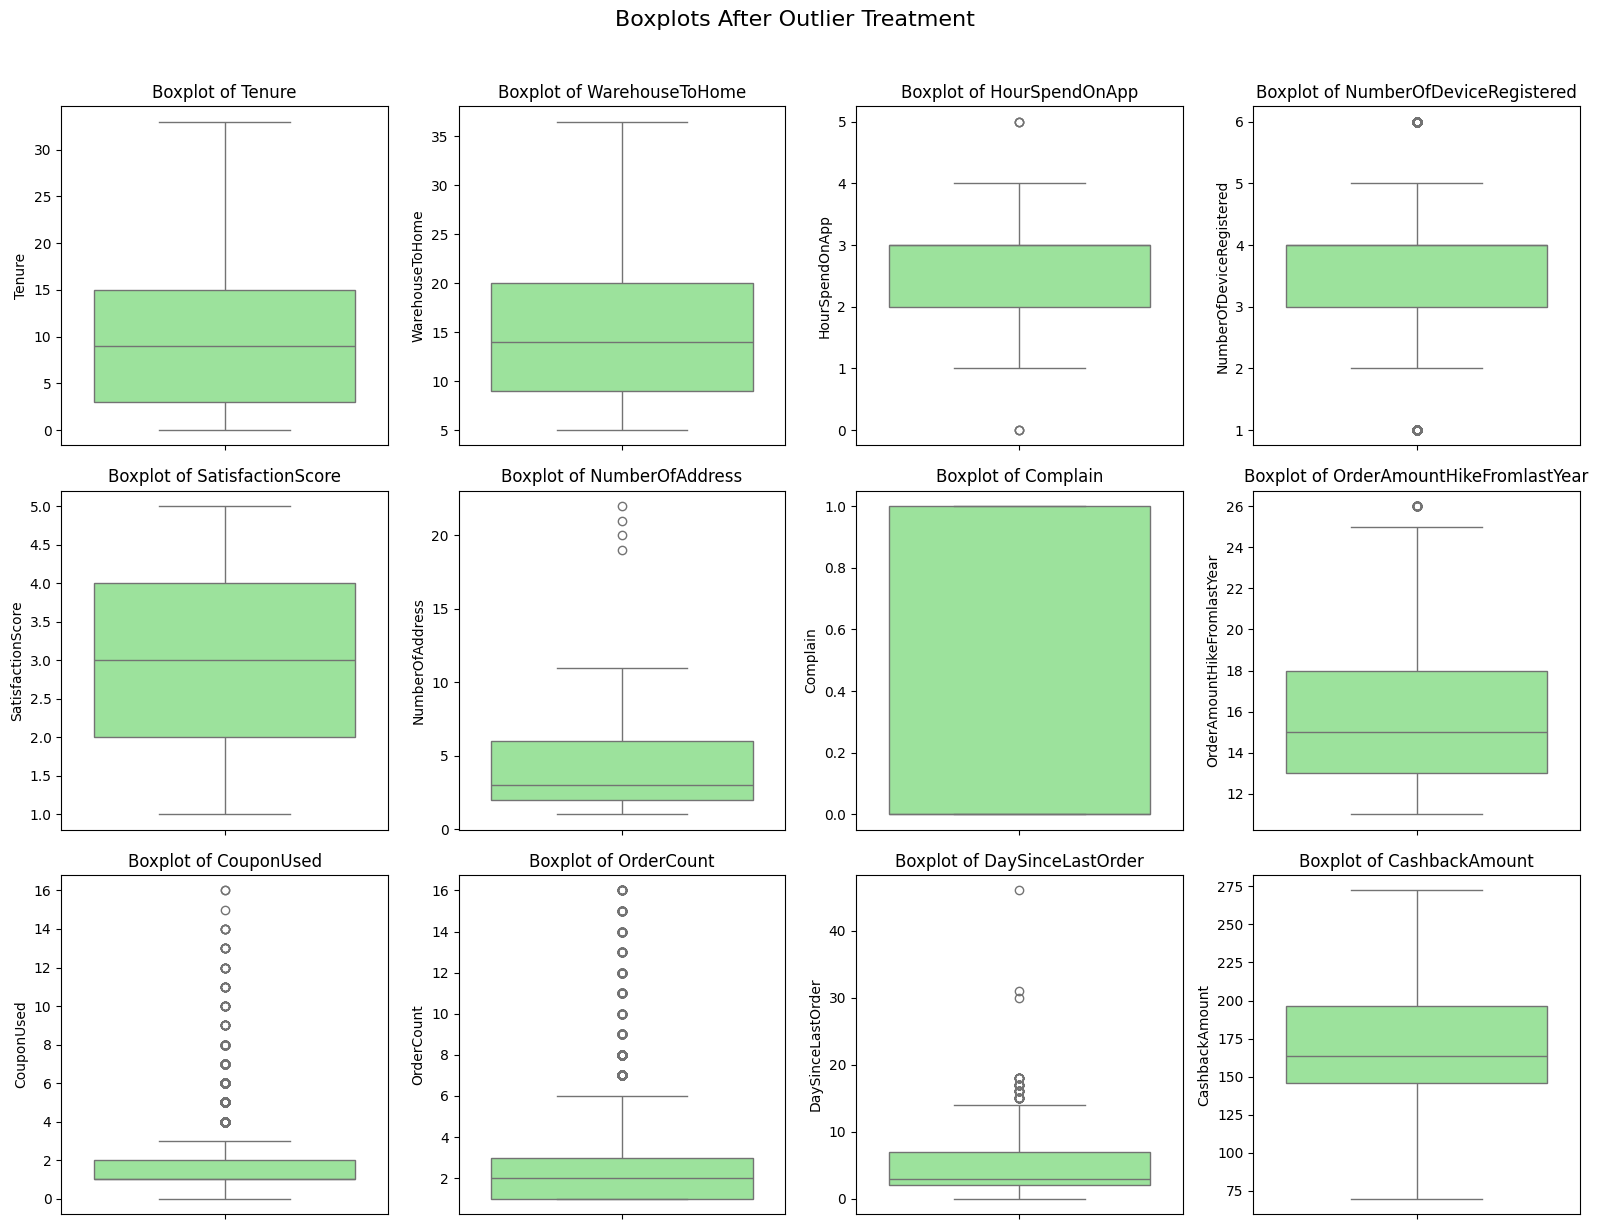

In [29]:
# Boxplot sau khi xử lý outlier
num_cols_plot = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_cols = 4
n_rows = (len(num_cols_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(num_cols_plot):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='lightgreen')
    axes[idx].set_title(f'Boxplot of {col}', fontsize=12)
    axes[idx].set_ylabel(col)

# Ẩn các subplot thừa
for idx in range(len(num_cols_plot), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Boxplots After Outlier Treatment', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**Kết quả xử lý outlier:**
- Chỉ xử lý outlier cho các biến có thể là lỗi nhập liệu: `WarehouseToHome`, `Tenure`, `CashbackAmount`
- Giữ nguyên outlier của `OrderCount`, `DaySinceLastOrder`, `NumberOfAddress` vì chứa thông tin hành vi quan trọng cho việc dự đoán `churn`
- Phương pháp: Winsorization (clip giá trị về biên IQR)

In [30]:
# Tính tỷ lệ churn
churn_count = df['Churn'].astype(int).sum()
total_count = len(df)
not_churn_count = total_count - churn_count

# Tính tỷ lệ phần trăm churn so với tổng
Churn_perc = round((churn_count * 100 / total_count), 2)

print(f"Tổng số khách hàng: {total_count}")
print(f"Khách hàng churn: {churn_count}")
print(f"Khách hàng không churn: {not_churn_count}")

Tổng số khách hàng: 5630
Khách hàng churn: 948
Khách hàng không churn: 4682


Tỷ lệ churn trung bình: 16.84%


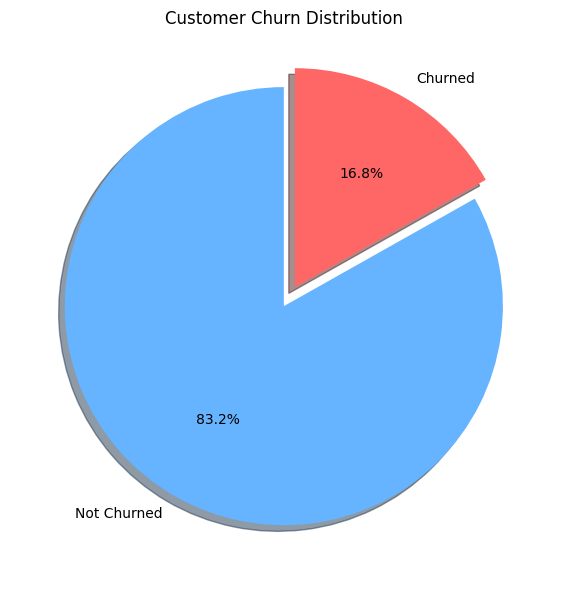

In [31]:
print(f'Tỷ lệ churn trung bình: {Churn_perc}%')

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(8, 6))
labels = ['Not Churned', 'Churned']
sizes = [not_churn_count, churn_count]
colors = ['#66b3ff', '#ff6666']
explode = (0, 0.1)

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.set_title('Customer Churn Distribution')
plt.tight_layout()
plt.show()

# 5. Exploratory Data Analysis



## 5.1. The Univariate Analysis

Lập danh sách các biến `categorical` và `numerical`

In [32]:
# Lập danh sách các biến categorical và numerical
cat = []
num = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)
    else:
        num.append(col)

print(f'Categorical columns ({len(cat)}): {cat}')
print(f'\nNumerical columns ({len(num)}): {num}')

Categorical columns (7): ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

Numerical columns (12): ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [33]:
df[cat].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,2,Mobile Phone,3996
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile Phone,2080
MaritalStatus,5630,3,Married,2986


In [34]:
# Thống kê chi tiết cho các biến categorical
for col in cat:
    print(f"{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")
    print()

Churn:
Churn
0    4682
1     948
Name: count, dtype: int64
Unique values: 2

PreferredLoginDevice:
PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64
Unique values: 2

CityTier:
CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64
Unique values: 3

PreferredPaymentMode:
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64
Unique values: 5

Gender:
Gender
Male      3384
Female    2246
Name: count, dtype: int64
Unique values: 2

PreferedOrderCat:
PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64
Unique values: 5

MaritalStatus:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64
Unique values: 3



In [35]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.00000,3.00,9.00,15.0000,33.00000
WarehouseToHome,5630.0,15.534813,8.089328,5.00000,9.00,14.00,20.0000,36.50000
HourSpendOnApp,5630.0,2.934636,0.705528,0.00000,2.00,3.00,3.0000,5.00000
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.00000,3.00,4.00,4.0000,6.00000
SatisfactionScore,5630.0,3.066785,1.380194,1.00000,2.00,3.00,4.0000,5.00000
NumberOfAddress,5630.0,4.214032,2.583586,1.00000,2.00,3.00,6.0000,22.00000
Complain,5630.0,0.284902,0.451408,0.00000,0.00,0.00,1.0000,1.00000
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.00000,13.00,15.00,18.0000,26.00000
CouponUsed,5630.0,1.716874,1.857640,0.00000,1.00,1.00,2.0000,16.00000
OrderCount,5630.0,2.961812,2.879248,1.00000,1.00,2.00,3.0000,16.00000


array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'WarehouseToHome'}>,
        <Axes: title={'center': 'HourSpendOnApp'}>],
       [<Axes: title={'center': 'NumberOfDeviceRegistered'}>,
        <Axes: title={'center': 'SatisfactionScore'}>,
        <Axes: title={'center': 'NumberOfAddress'}>],
       [<Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'OrderAmountHikeFromlastYear'}>,
        <Axes: title={'center': 'CouponUsed'}>],
       [<Axes: title={'center': 'OrderCount'}>,
        <Axes: title={'center': 'DaySinceLastOrder'}>,
        <Axes: title={'center': 'CashbackAmount'}>]], dtype=object)

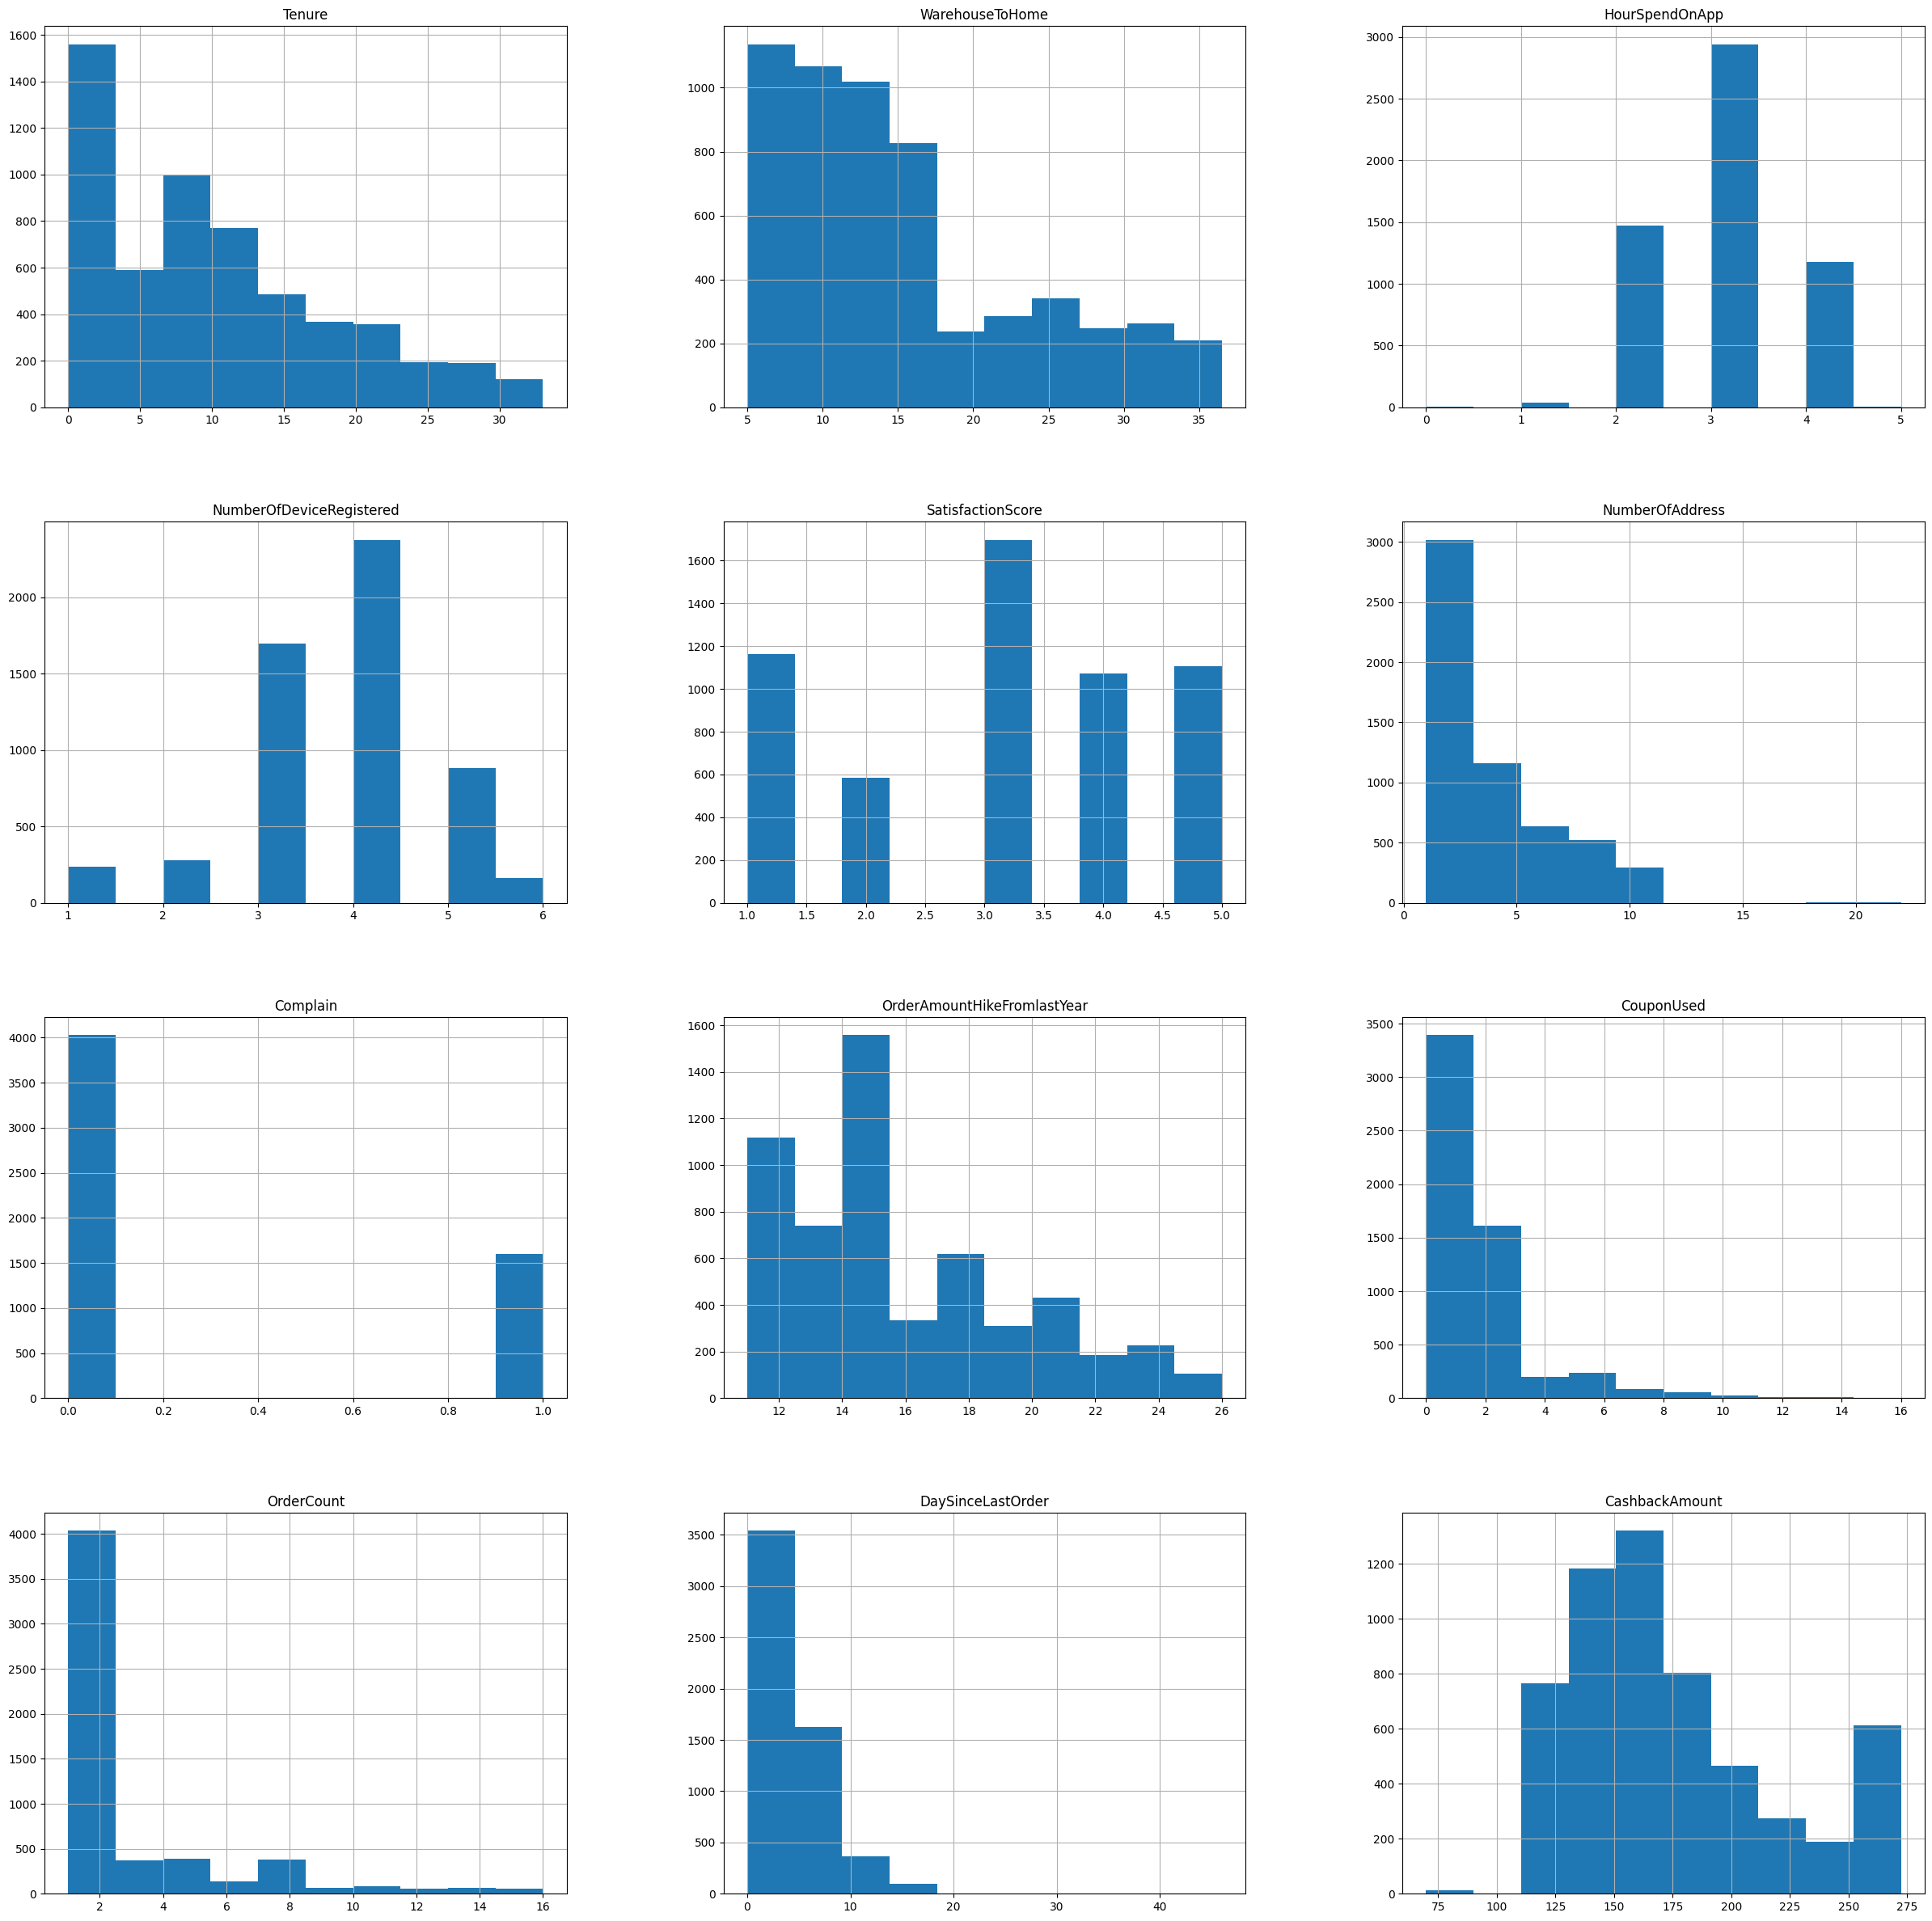

In [36]:
df[num].hist(figsize=(30,30))

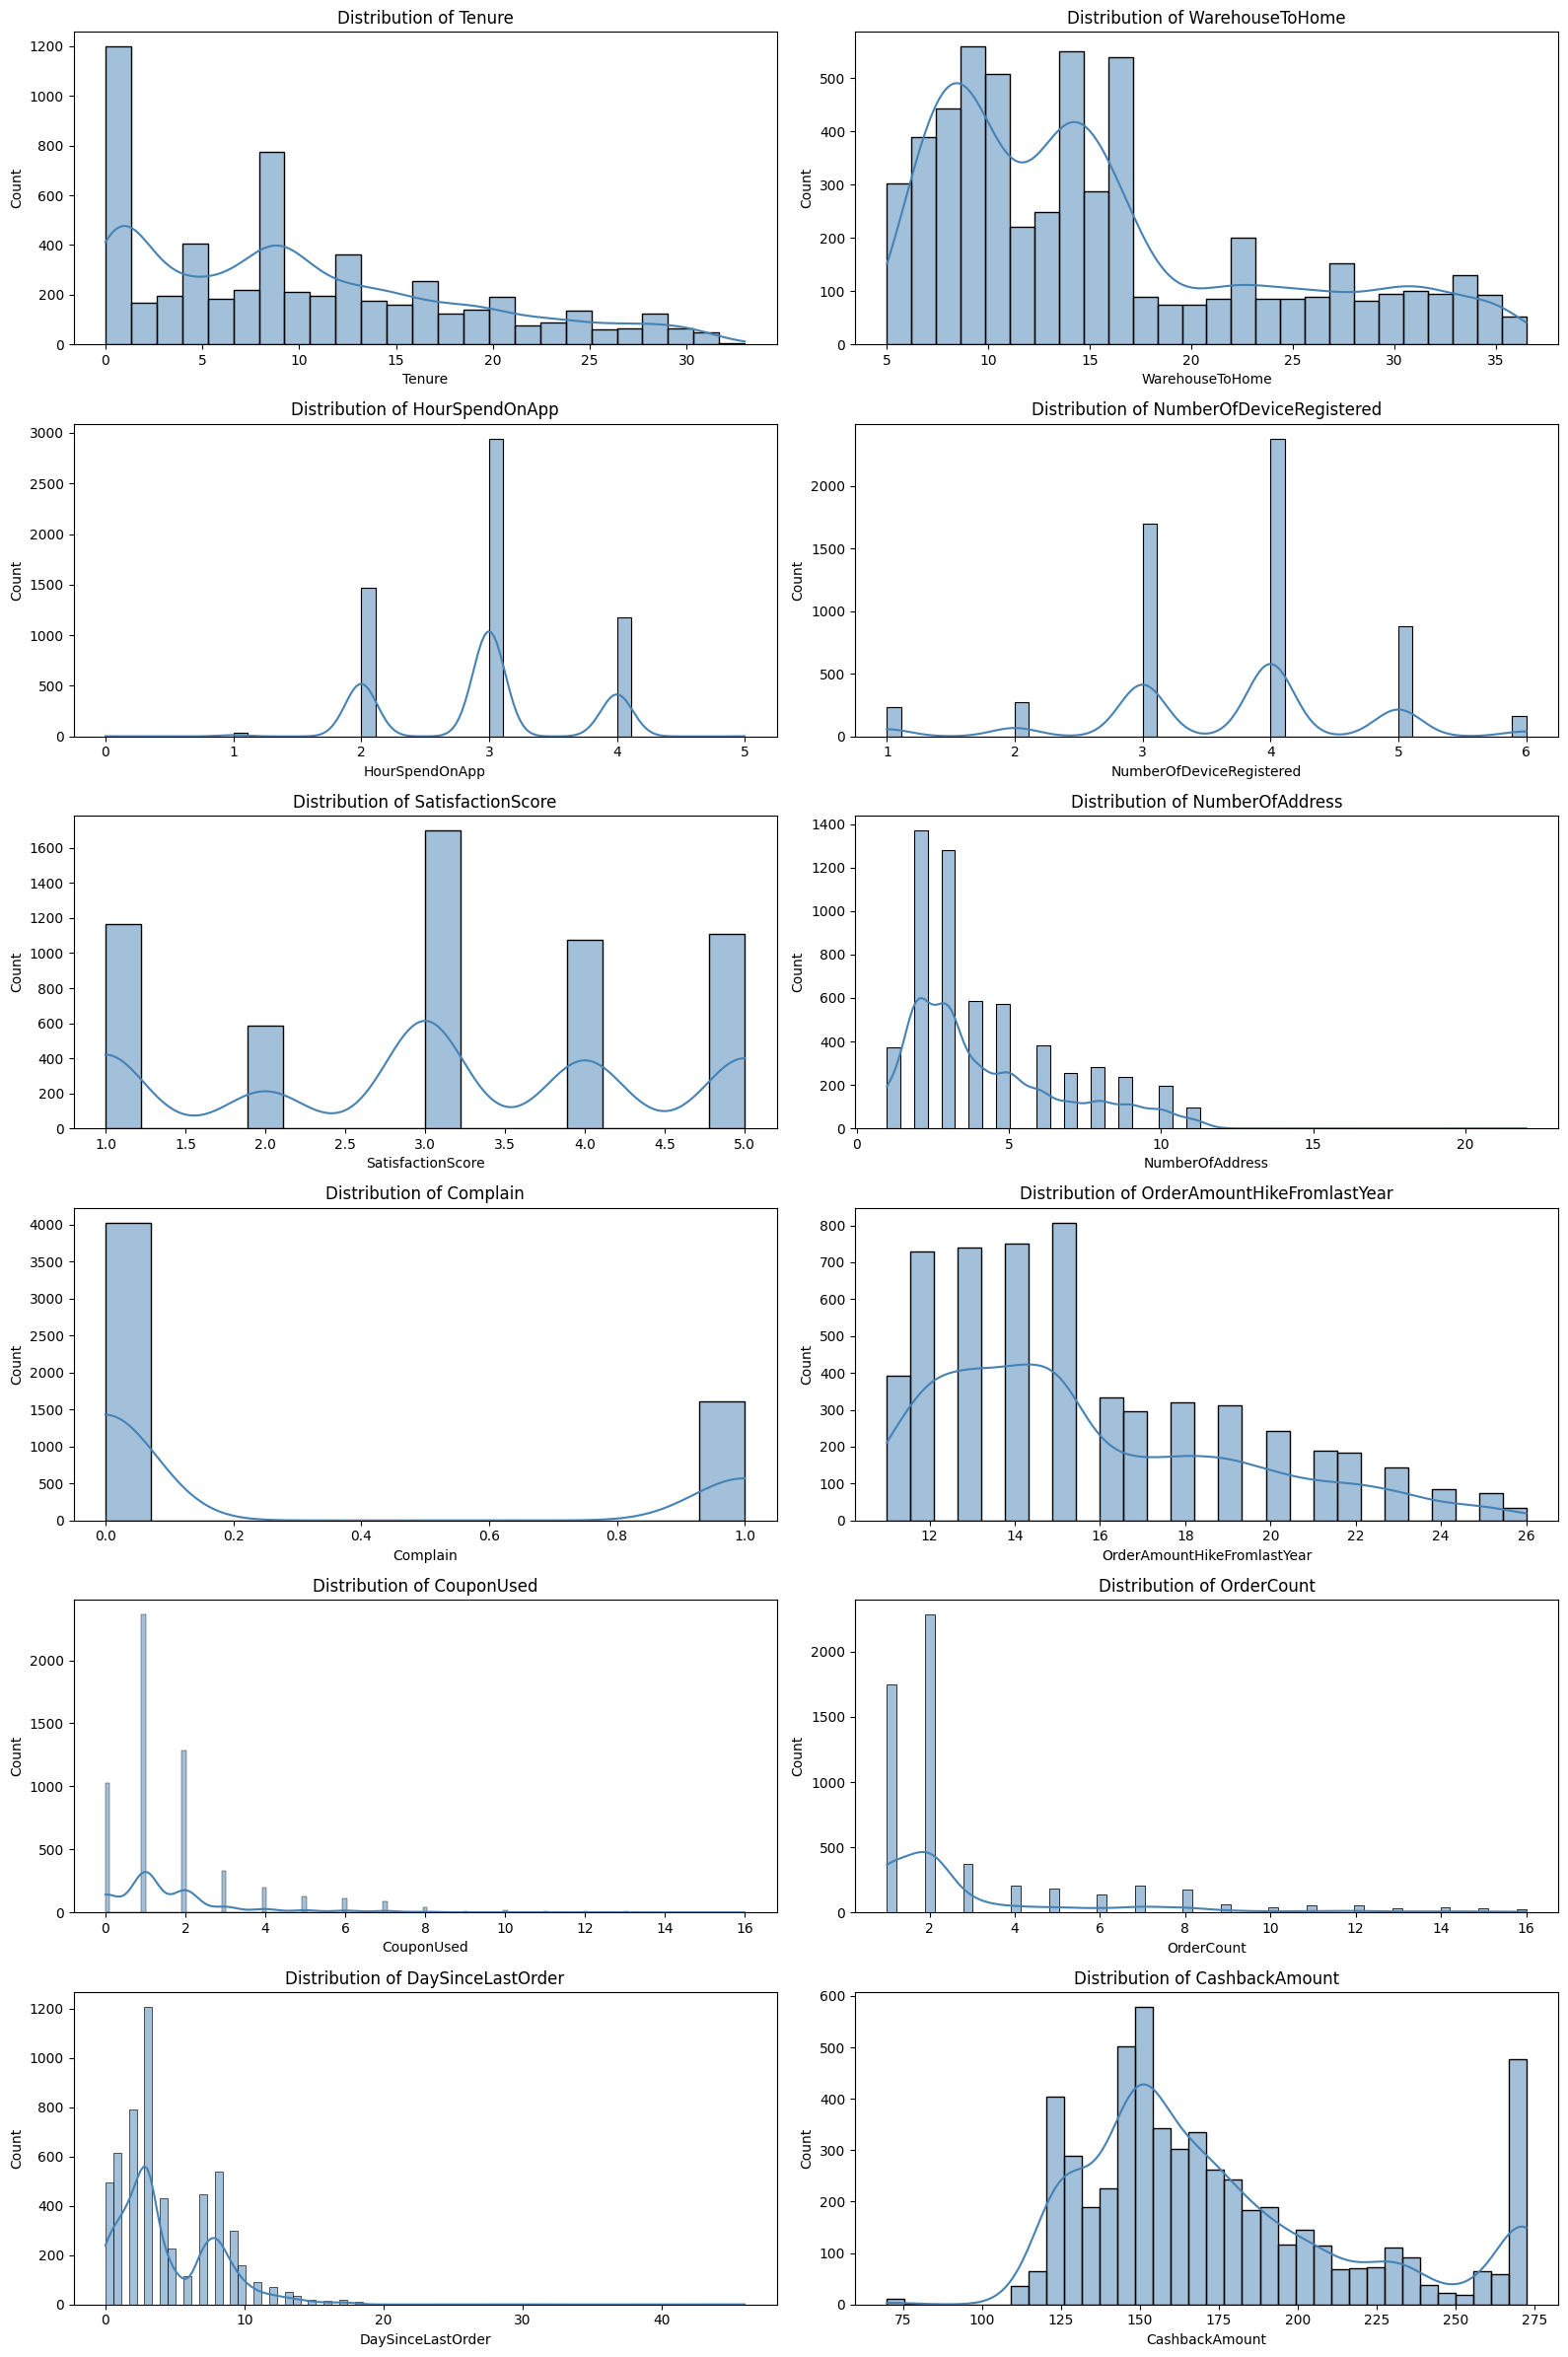

In [37]:
# Vẽ distribution plot cho các biến numerical
n_cols = 2
n_rows = (len(num) + 1) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(num):
    if idx < len(axes):
        sns.histplot(df[col], ax=axes[idx], kde=True, color='steelblue')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)

# Ẩn các subplot thừa
for idx in range(len(num), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## 5.2. EDA - Univariate Analysis - Analysing Churn by each Variable

In [38]:
# Tạo dictionary lưu thông tin churn theo từng biến
d = {}

for i in df.columns:
    # Convert Churn sang int để tính toán
    df_temp = df.copy()
    df_temp['Churn'] = df_temp['Churn'].astype(int)
    
    # Tính số khách hàng churn theo từng giá trị của biến
    churn_sum_series = df_temp.groupby(i)['Churn'].sum()
    total_customers_series = df[i].value_counts().sort_index()
    
    # Đảm bảo index khớp nhau
    churn_sum_series = churn_sum_series.reindex(total_customers_series.index, fill_value=0)
    
    # Tính phần trăm
    percentage_series = (churn_sum_series * 100 / total_customers_series).astype(float).round(2)
    
    # Tạo DataFrame
    temp_df = pd.DataFrame({
        i: total_customers_series.index,
        'Customers_churned': churn_sum_series.values,
        'Total_Customers': total_customers_series.values,
        'perc_of_total_cust': percentage_series.values
    })
    
    d[i] = temp_df

print("Đã tính xong thống kê churn cho tất cả các biến.")

Đã tính xong thống kê churn cho tất cả các biến.


In [39]:
# Xem một vài ví dụ về thống kê churn
sample_vars = ['Tenure', 'Complain', 'CityTier', 'Gender']
for var in sample_vars:
    if var in d:
        print(f"\n{var}:")
        print(d[var])
        print()


Tenure:
    Tenure  Customers_churned  Total_Customers  perc_of_total_cust
0      0.0                272              508               53.54
1      1.0                349              690               50.58
2      2.0                 14              167                8.38
3      3.0                 18              195                9.23
4      4.0                 20              203                9.85
5      5.0                 16              204                7.84
6      6.0                  8              183                4.37
7      7.0                 16              221                7.24
8      8.0                 16              263                6.08
9      9.0                 93              511               18.20
10    10.0                 14              213                6.57
11    11.0                 10              194                5.15
12    12.0                  7              182                3.85
13    13.0                 13              181       

## 5.3 Analysing the Churn by each Variable - Visualising via Graphs



In [40]:
def analysis_chart(variable):
    """Vẽ biểu đồ phân tích churn theo từng biến."""
    # Kiểm tra biến có tồn tại trong dictionary không
    if variable not in d:
        print(f"Biến '{variable}' không tồn tại trong dữ liệu!")
        return
    
    # Tạo figure
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Lấy dữ liệu
    data = d[variable]
    x_values = range(len(data))
    
    # Vẽ các đường
    line1 = ax.plot(x_values, data['Customers_churned'], color='lightskyblue', 
                    marker='o', label='Customers churned')
    line2 = ax.plot(x_values, data['Total_Customers'], color='dodgerblue', 
                    marker='s', label='Total Customers')
    
    # Cài đặt trục x
    ax.set_xticks(x_values)
    ax.set_xticklabels(data[variable], rotation=45, ha='right')
    ax.set_xlabel(variable)
    ax.set_ylabel('No. of customers')
    ax.set_title(f'Customers Churn analysed by {variable}')
    
    # Tạo trục y thứ hai
    ax2 = ax.twinx()
    line3 = ax2.plot(x_values, data['perc_of_total_cust'], color='yellowgreen', 
                     marker='^', label='Churn as Percent of total')
    line4 = ax2.axhline(y=Churn_perc, color='orangered', linestyle='dashed', 
                        label=f'Average Churn ({Churn_perc}%)')
    ax2.set_ylabel('Percentage of customers churned (%)')
    
    # Legend
    lines = line1 + line2 + line3 + [line4]
    labs = [l.get_label() for l in lines]
    ax.legend(lines, labs, loc='upper right', bbox_to_anchor=(1.35, 1))
    
    # Style
    sns.despine(ax=ax, right=True, left=False)
    plt.tight_layout()
    plt.show()

In [41]:
# Danh sách các cột cần phân tích (loại bỏ CashbackAmount vì sẽ dùng feature mới tạo sau này)
analysis_cols = ['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder']

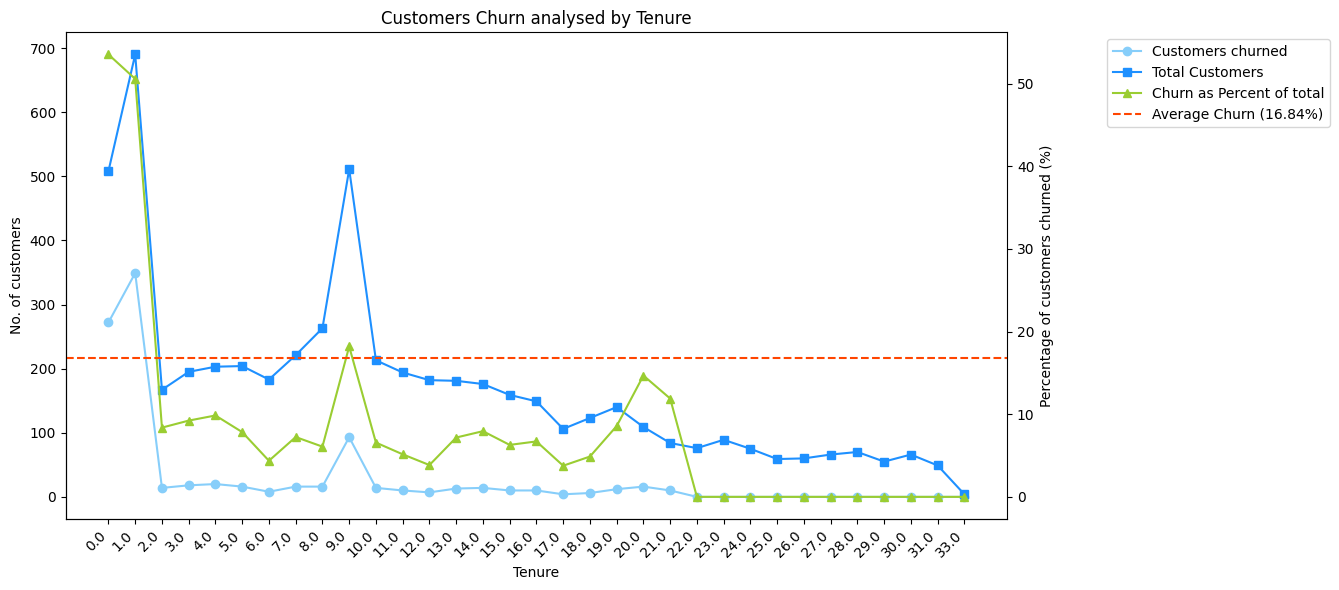

In [42]:
analysis_chart('Tenure')

-> Khách hàng mới (Thời hạn 0-1) cho thấy tỷ lệ rời bỏ cực kỳ cao (~50-55%, trung bình gấp 2,5 lần). Tỷ lệ rời bỏ giảm mạnh khi thời hạn tăng, đạt gần bằng 0 đối với khách hàng lâu năm (trên 20 tháng).

=> Ảnh hưởng mạnh đến `churn`

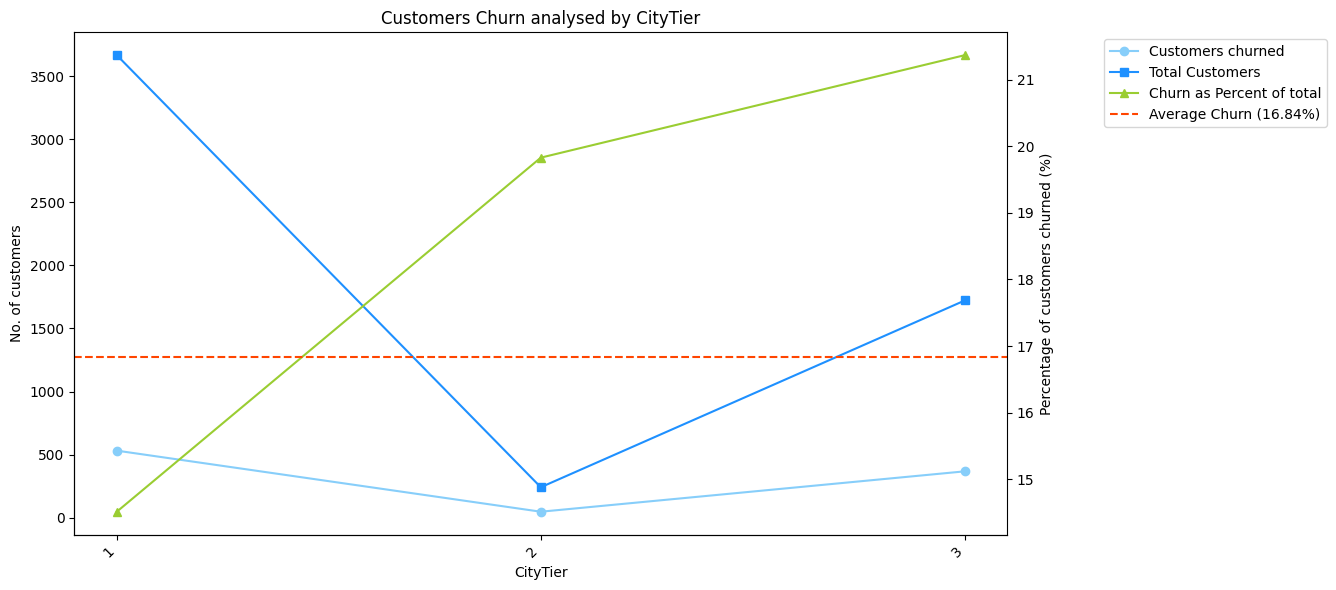

In [43]:
analysis_chart('CityTier')

-> Các thành phố Hạng 1 có tỷ lệ khách hàng rời bỏ dịch vụ dưới mức trung bình (~ 15%), Hạng 2 gần mức trung bình (~ 20%) và các thành phố Hạng 3 trên mức trung bình (~ 21%). Tỷ lệ khách hàng rời bỏ dịch vụ tăng khi hạng thành phố giảm (từ các đô thị lớn đến các thành phố nhỏ hơn).

=> Ảnh hưởng vừa phải đến `churn` - Khách hàng ở các thành phố Hạng 1 (các đô thị lớn) trung thành hơn.

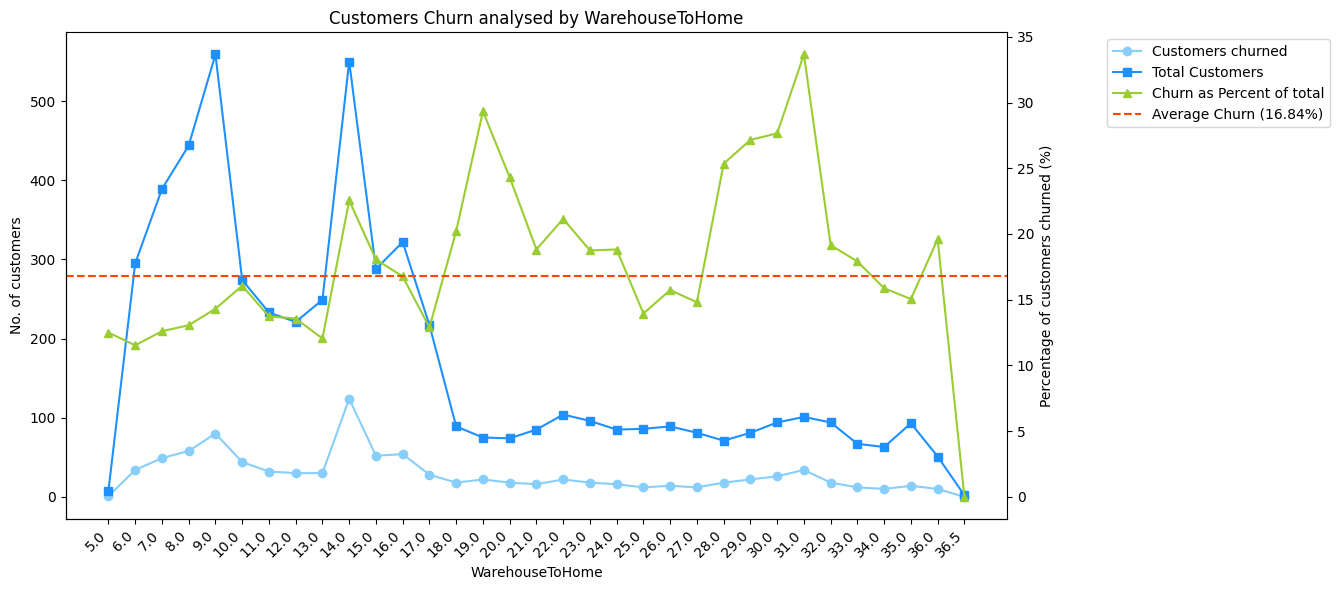

In [44]:
analysis_chart('WarehouseToHome')

-> Một số khoảng cách nhất định cho thấy tỷ lệ khách hàng bỏ dịch vụ cao (ví dụ: ~15-17km và ~30-32km đạt 28-33%, cao hơn mức trung bình). Hầu hết các khoảng cách dao động quanh mức cơ sở 20% nhưng có sự khác biệt đáng kể.

=> Ảnh hưởng vừa phải đến `churn` - Khoảng cách giao hàng quan trọng, nhưng mối quan hệ này không tuyến tính và phức tạp.

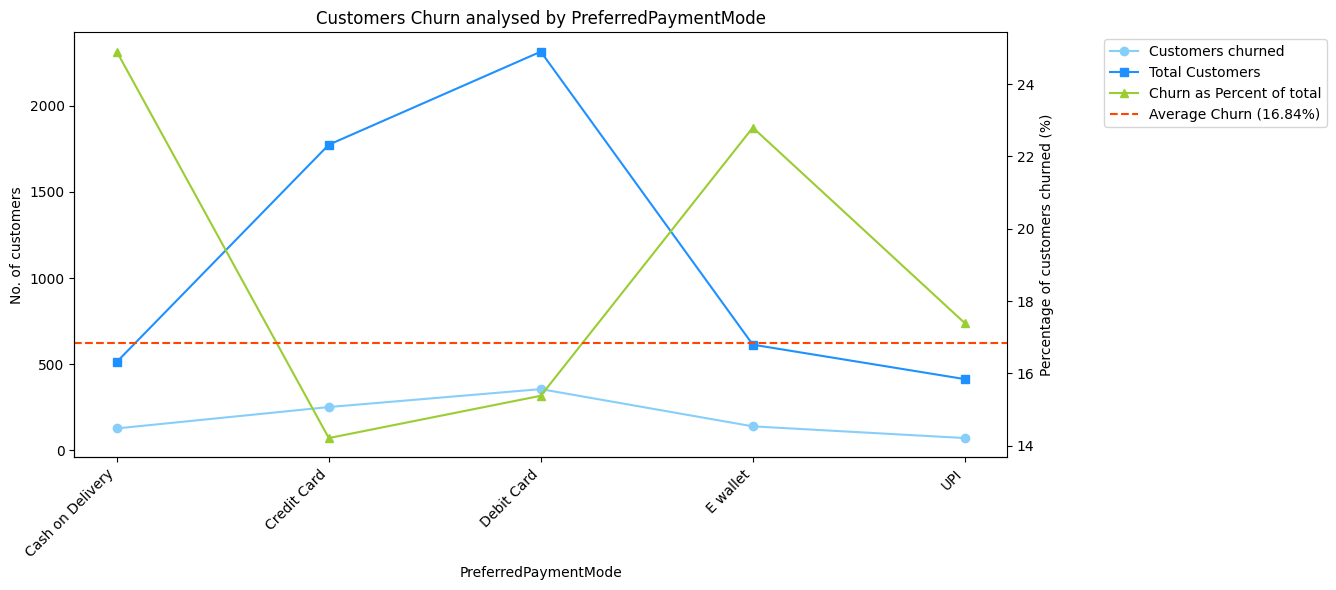

In [45]:
analysis_chart('PreferredPaymentMode')

-> Sự khác biệt rõ ràng giữa các phương thức thanh toán. Thanh toán khi nhận hàng cho thấy tỷ lệ khách hàng rời bỏ cao nhất (~ 25%, cao hơn mức trung bình). Người dùng thẻ tín dụng có tỷ lệ rời bỏ thấp nhất (~ 14%, thấp hơn mức trung bình). Thẻ ghi nợ, Ví điện tử và UPI dao động gần mức cơ sở 20%, với Ví điện tử tăng nhẹ (~23%).

=> Ảnh hưởng vừa phải đến `churn` - Ưu tiên thanh toán cho thấy phân khúc khách hàng.

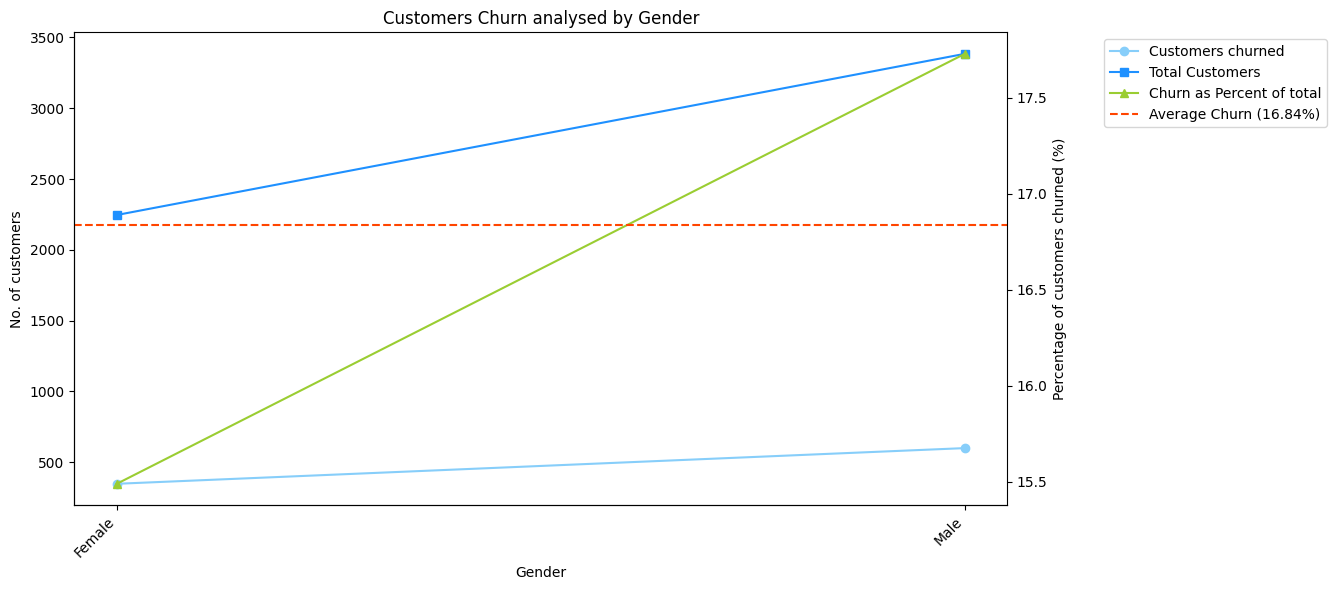

In [46]:
analysis_chart('Gender')

-> Cả khách hàng nam và nữ đều cho thấy tỷ lệ rời bỏ dịch vụ rất gần với mức cơ sở trung bình 20%. Đường màu xanh lá cây về cơ bản vẫn nằm ngang ở cả hai nhóm với sự khác biệt không đáng kể (~17-20%).

=> Không ảnh hưởng đáng kể đến `churn` - Giới tính không phải là yếu tố dự báo có ý nghĩa.

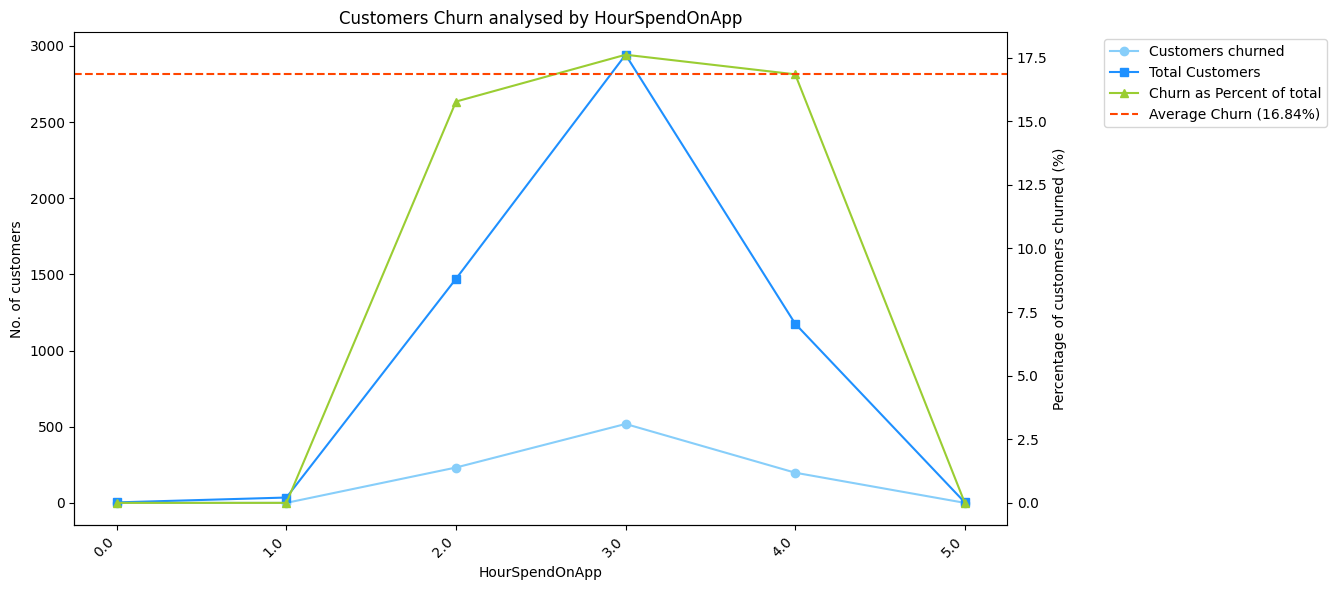

In [47]:
analysis_chart('HourSpendOnApp')

-> Tỷ lệ rời bỏ (đường màu xanh lá cây) luôn thấp hơn mức trung bình 20% trên tất cả các mức độ tương tác, dao động quanh mức 15-17%. Không có xu hướng rõ ràng nào cho thấy khách hàng dành ít thời gian hay nhiều giờ trên ứng dụng.

=> Không ảnh hưởng đáng kể đến `churn` - Thời gian tương tác trên ứng dụng không phải là yếu tố dự báo mạnh.

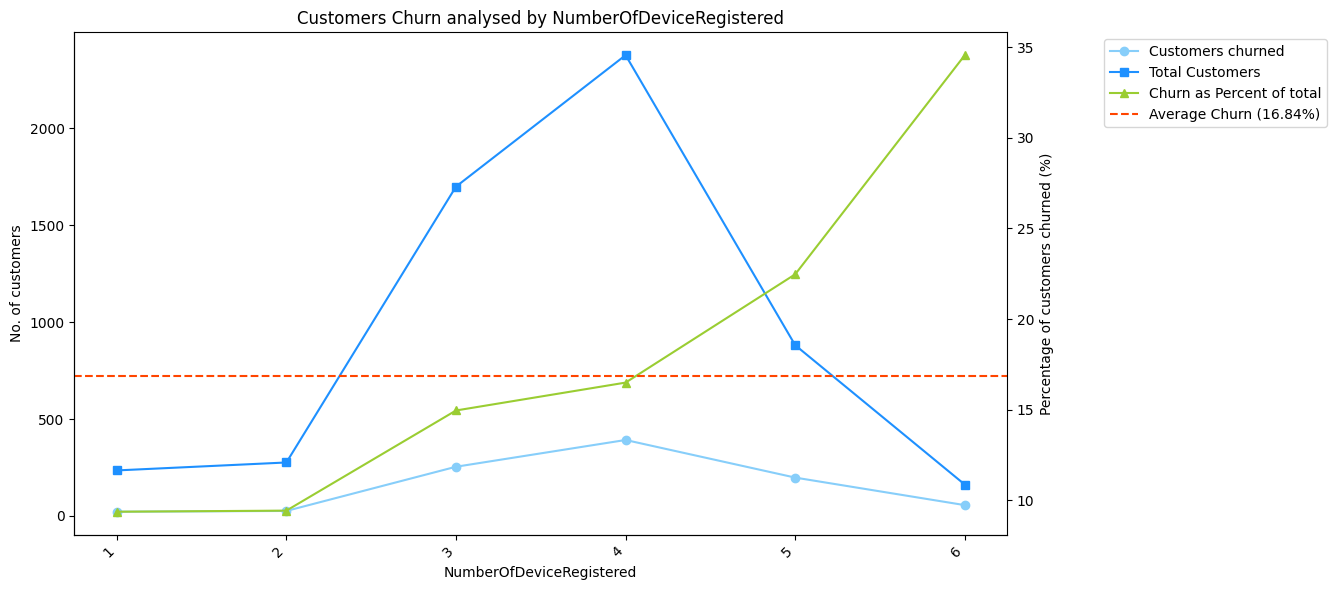

In [48]:
analysis_chart('NumberOfDeviceRegistered')

-> Khách hàng có 1-4 thiết bị cho thấy tỷ lệ rời bỏ gần mức trung bình (10-17%). Tuy nhiên, khách hàng có 5,5 thiết bị trở lên cho thấy tỷ lệ rời bỏ bùng nổ (~35%, gấp 1,75 lần trung bình) - điều này trái ngược với trực giác nhưng đáng kể.

=> Ảnh hưởng vừa phải đến `churn` - Quá nhiều thiết bị đã đăng ký là một dấu hiệu cảnh báo, có thể cho thấy việc chia sẻ tài khoản, hành vi thử nghiệm hoặc thói quen sử dụng không có tổ chức dẫn đến việc từ bỏ.

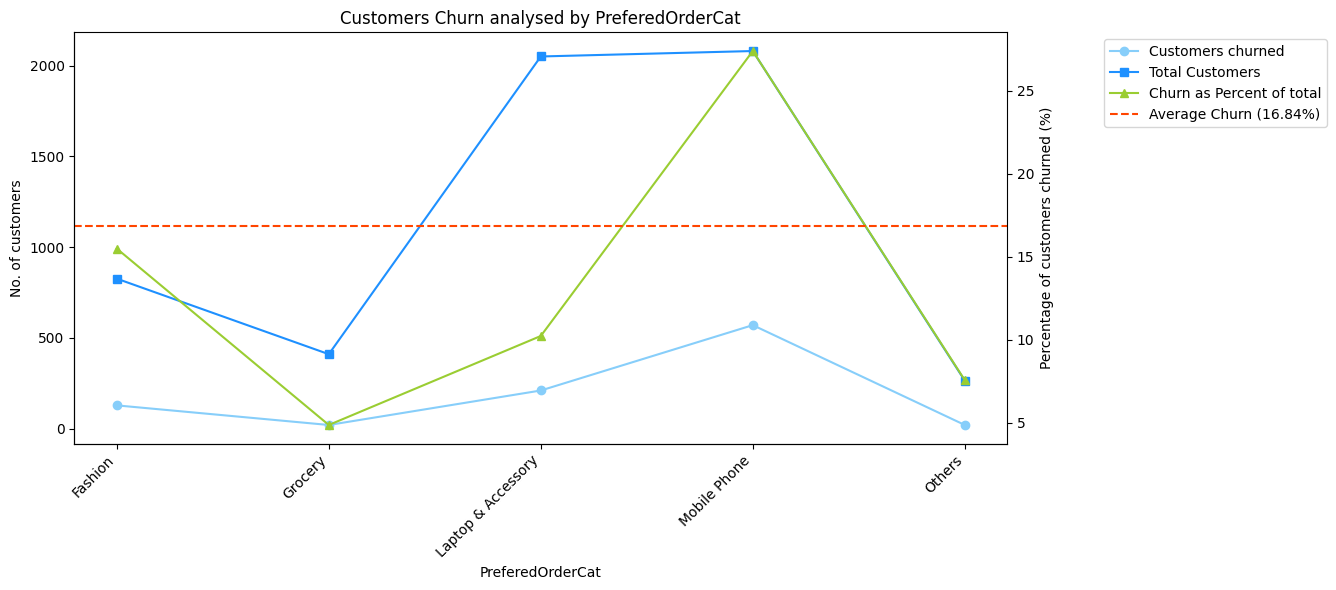

In [49]:
analysis_chart('PreferedOrderCat')

-> Khách hàng tạp hóa thể hiện lòng trung thành đặc biệt (tỷ lệ khách hàng rời bỏ khoảng 5%). Thời trang và các ngành hàng khác dưới mức trung bình (khoảng 8-15%). Người dùng máy tính xách tay và phụ kiện có tỷ lệ rời bỏ cao nhất (khoảng 26%), người dùng điện thoại di động gần mức trung bình (khoảng 20%).

=> Ảnh hưởng mạnh mẽ đến `churn` - Ngành hàng là một chỉ số quan trọng. Người mua đồ điện tử (máy tính xách tay/điện thoại) có rủi ro cao hơn; người mua hàng tạp hóa là những người trung thành nhất.

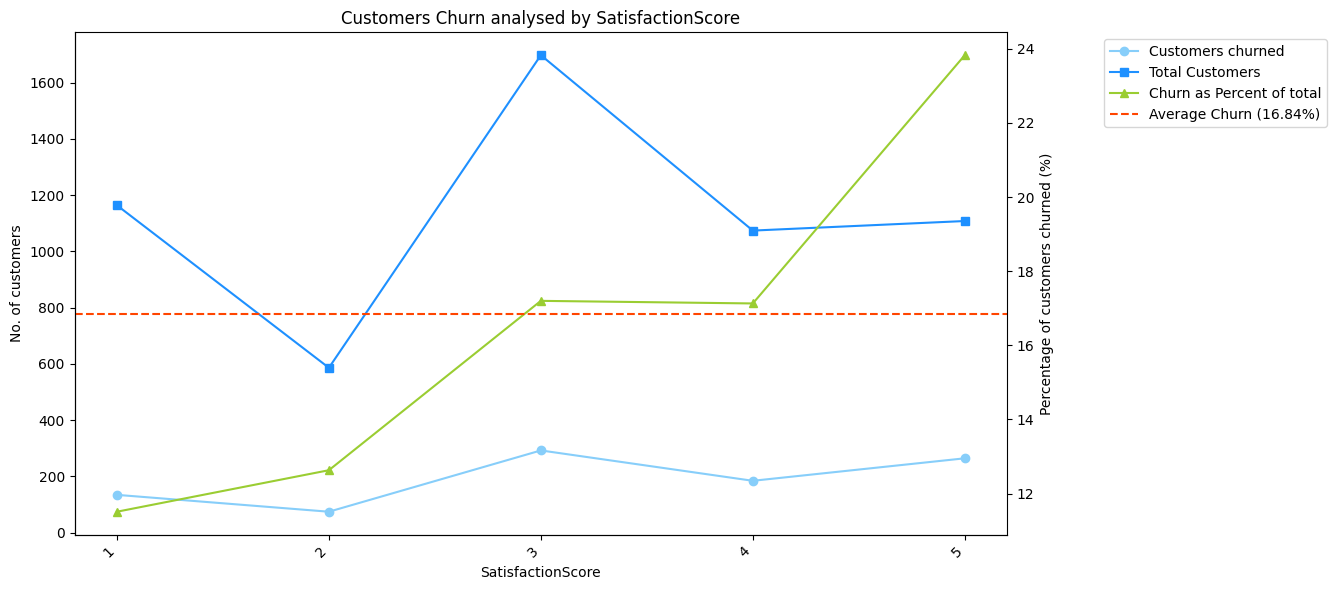

In [50]:
analysis_chart('SatisfactionScore')

-> Mức độ hài lòng thấp hơn (1,0-2,0) cho thấy tỷ lệ khách hàng rời bỏ dịch vụ dưới mức trung bình (~ 12%), trong khi mức độ hài lòng cao hơn (4,5-5,0) cho thấy tỷ lệ khách hàng rời bỏ dịch vụ cao hơn (~ 24%). Điều này đảo ngược kỳ vọng thông thường.

=> Ảnh hưởng đến `churn`

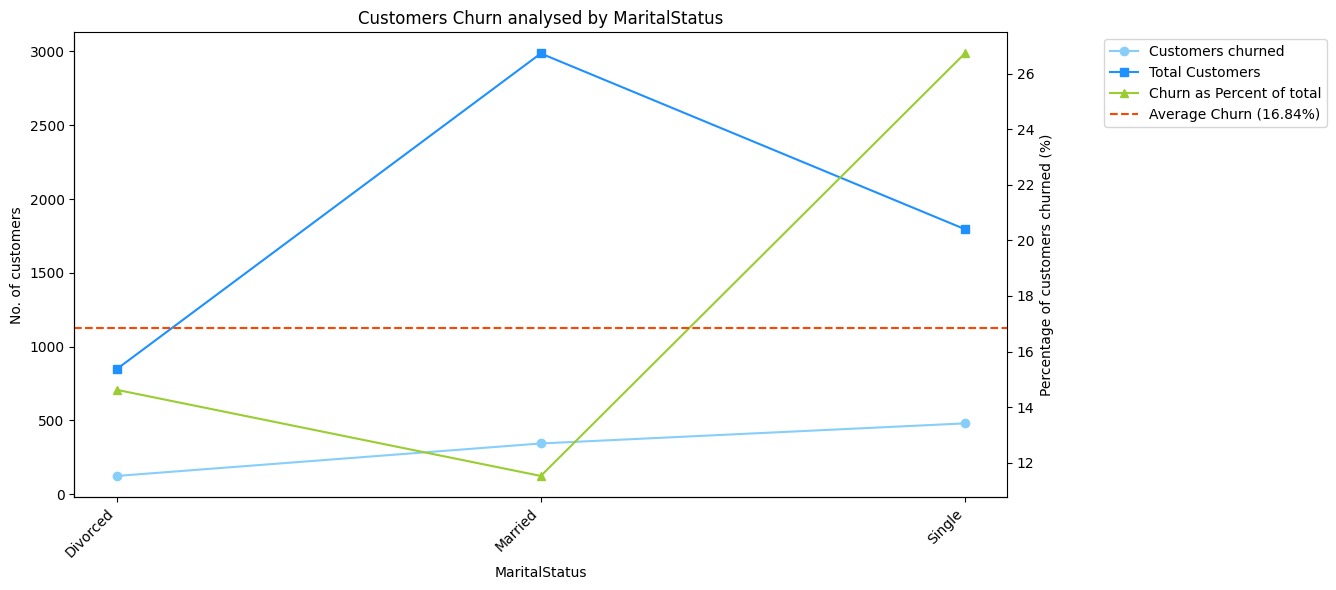

In [51]:
analysis_chart('MaritalStatus')

-> Khách hàng độc thân có tỷ lệ rời bỏ dịch vụ cao nhất (27%, trên mức trung bình). Khách hàng đã kết hôn ở mức gần trung bình (12-13%). Khách hàng đã ly hôn có tỷ lệ rời bỏ thấp nhất (~14%, dưới mức trung bình).

=> Ảnh hưởng ở mức độ vừa phải đến `churn` - Khách hàng độc thân có nguy cơ cao hơn, có thể do thói quen mua sắm kém ổn định hoặc hoàn cảnh sống. Khách hàng đã kết hôn/ly hôn có hành vi nhất quán hơn, ít rời bỏ hơn.

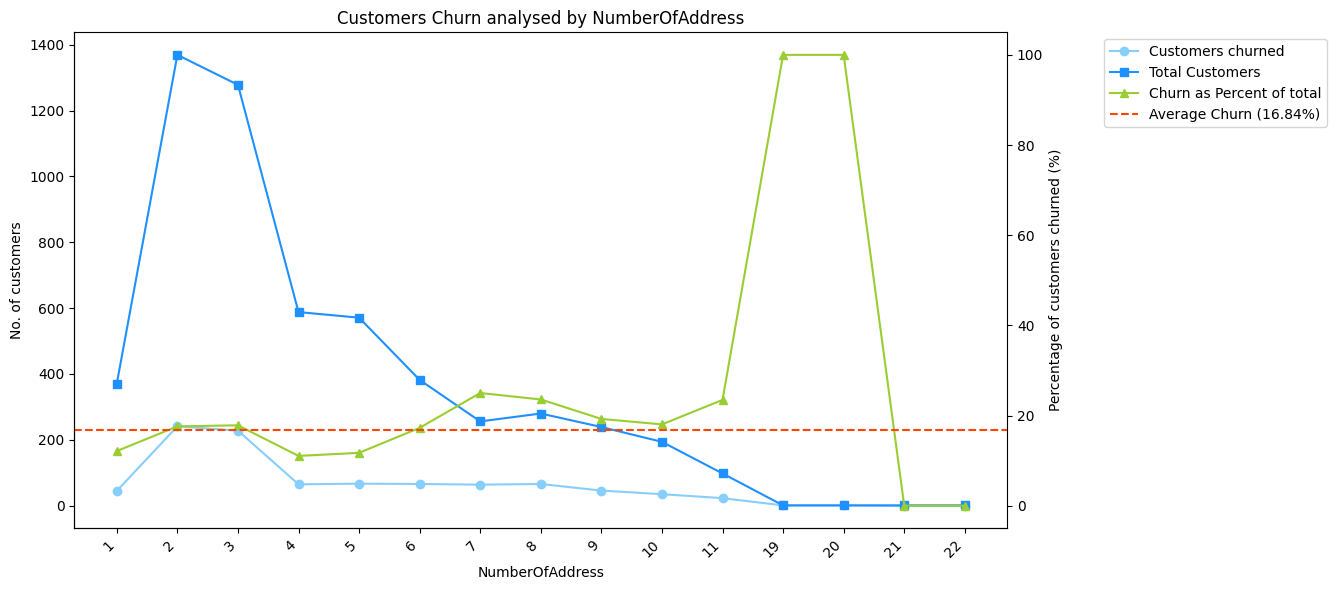

In [52]:
analysis_chart('NumberOfAddress')

-> Khách hàng có 1 địa chỉ cho thấy tỷ lệ rời bỏ thấp (~ 12%). Mức tăng đột biến mạnh ở 2-3 địa chỉ (~ 50%, gấp 2,5 lần trung bình!) - một dấu hiệu cảnh báo nghiêm trọng. Trở lại bình thường ở 4 địa chỉ trở lên, sau đó lại tăng đột biến ở 12 địa chỉ trở lên.

=> Ảnh hưởng MẠNH đến `churn` - Nhiều địa chỉ (2-3) là yếu tố dự báo mạnh nhất từng thấy. Có thể cho thấy sự do dự, thay đổi địa chỉ trong quá trình di dời, kiểm tra tài khoản hoặc các vấn đề về giao hàng. Đây là một tín hiệu cảnh báo sớm quan trọng.

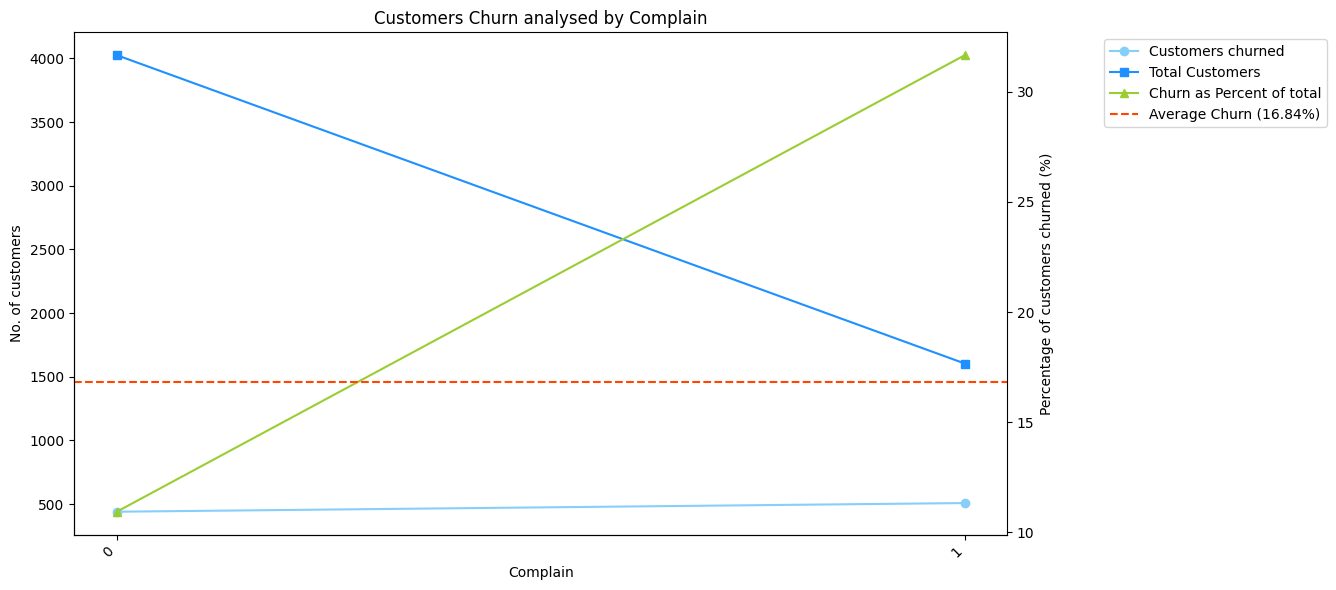

In [53]:
analysis_chart('Complain')

-> Không có khiếu nại (0,0) cho thấy tỷ lệ khách hàng rời bỏ dịch vụ dưới mức trung bình (~ 12%). Có khiếu nại (1,0) cho thấy tỷ lệ khách hàng rời bỏ dịch vụ cao (~31%, gấp 1,55 lần trung bình).

=> Ảnh hưởng mạnh đến `churn` - Khiếu nại là một yếu tố dự báo mạnh mẽ. Khách hàng khiếu nại có khả năng rời bỏ dịch vụ cao hơn đáng kể, cho thấy việc khôi phục dịch vụ là rất quan trọng để duy trì khách hàng.

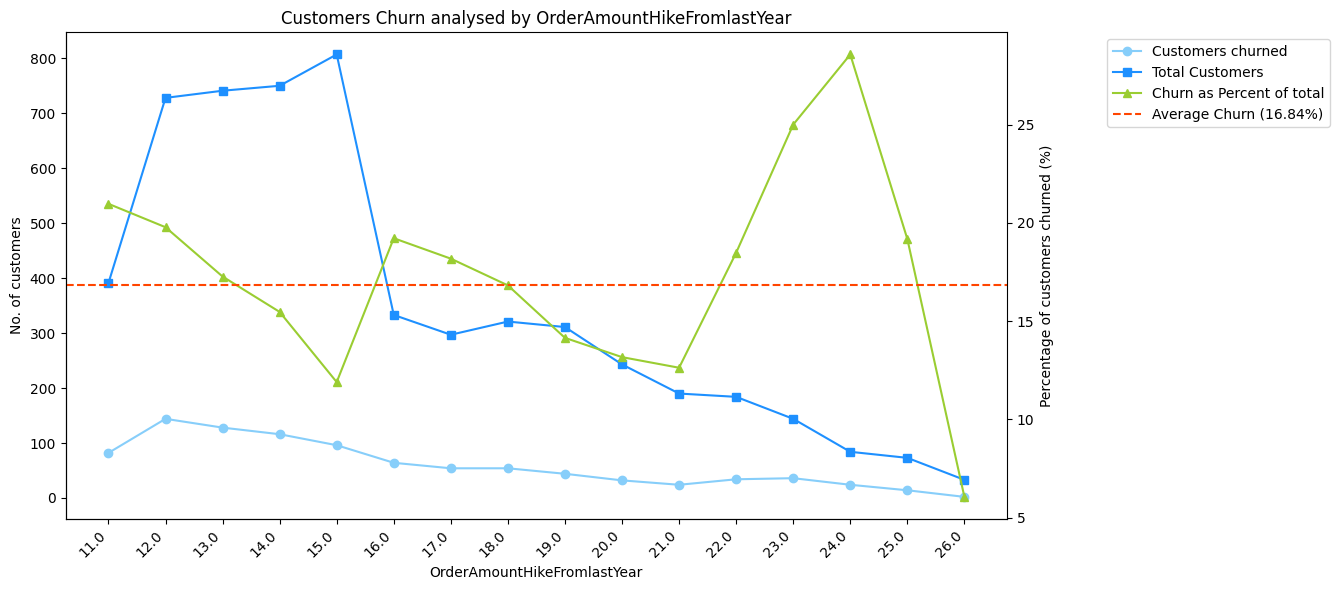

In [54]:
analysis_chart('OrderAmountHikeFromlastYear')

-> Tỷ lệ khách hàng rời bỏ dịch vụ thường duy trì gần mức cơ sở 20% nhưng đạt đỉnh ở một số mức tăng nhất định (mức tăng 11-12% và 23-24% đạt ~20-27%).

=> Tác động yếu/hỗn hợp đến `churn` - Việc tăng lượng đơn hàng không cho thấy mối quan hệ nhất quán mạnh mẽ với tỷ lệ khách hàng rời bỏ dịch vụ. Một số phạm vi tăng cụ thể tương quan với tỷ lệ khách hàng rời bỏ dịch vụ cao, nhưng mô hình này không ổn định và khó đoán.

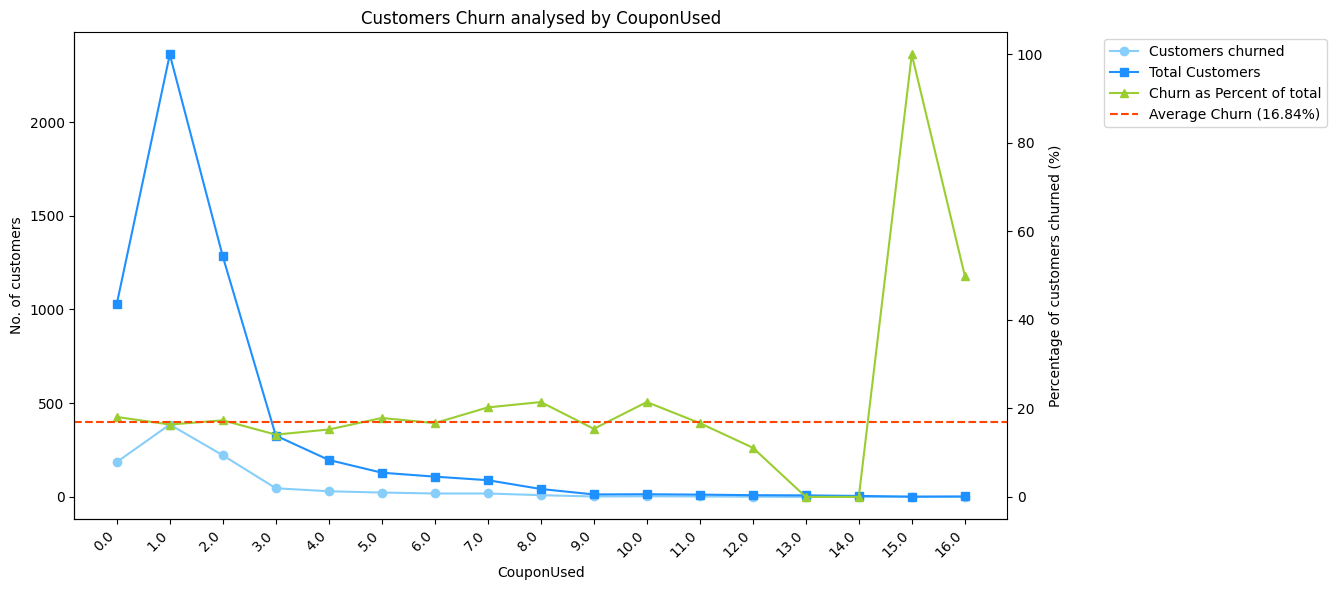

In [55]:
analysis_chart('CouponUsed')

-> Tỷ lệ khách hàng rời bỏ dịch vụ duy trì ở mức 16-18% ở tất cả các mức sử dụng phiếu giảm giá (0-3,5%), luôn thấp hơn mức trung bình 20%. Không có xu hướng rõ ràng nào cho dù khách hàng không sử dụng hay sử dụng nhiều phiếu giảm giá.

=> Không ảnh hưởng đáng kể đến `churn` - Việc sử dụng phiếu giảm giá không phải là yếu tố dự báo mạnh. Tỷ lệ khách hàng rời bỏ dịch vụ ở mức thấp tương tự bất kể có tham gia chương trình khuyến mãi thông qua phiếu giảm giá hay không.

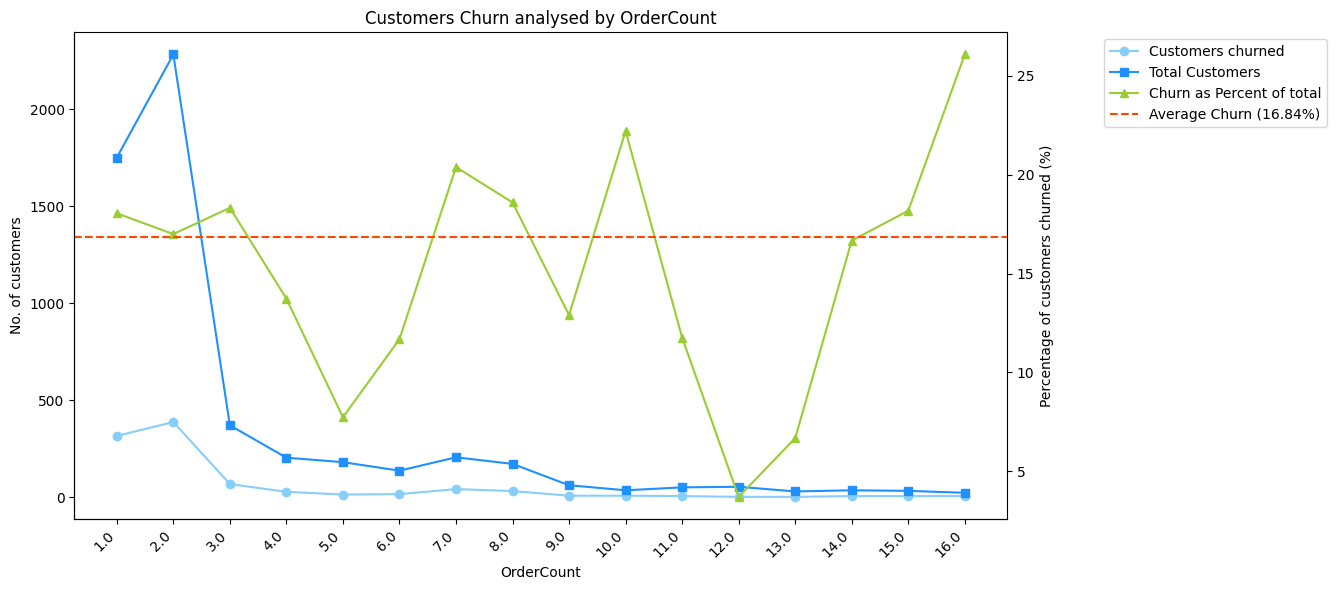

In [56]:
analysis_chart('OrderCount')

-> Số lượng đơn hàng thấp hơn (1-2) cho thấy tỷ lệ khách hàng rời bỏ gần mức trung bình (~ 17-18%). Khi đơn hàng tăng lên 5, tỷ lệ khách hàng rời bỏ giảm mạnh xuống còn ~ 8% (thấp hơn 60% so với mức trung bình). Phục hồi nhẹ ở 6 đơn hàng (~ 16%).

=> Ảnh hưởng mạnh đến `churn` - Khách hàng thường xuyên mua hàng có mức độ trung thành cao hơn đáng kể. Số lượng đơn hàng là một chỉ số duy trì khách hàng mạnh mẽ - khách hàng có lịch sử mua hàng lâu hơn sẽ ít có khả năng rời bỏ hơn.

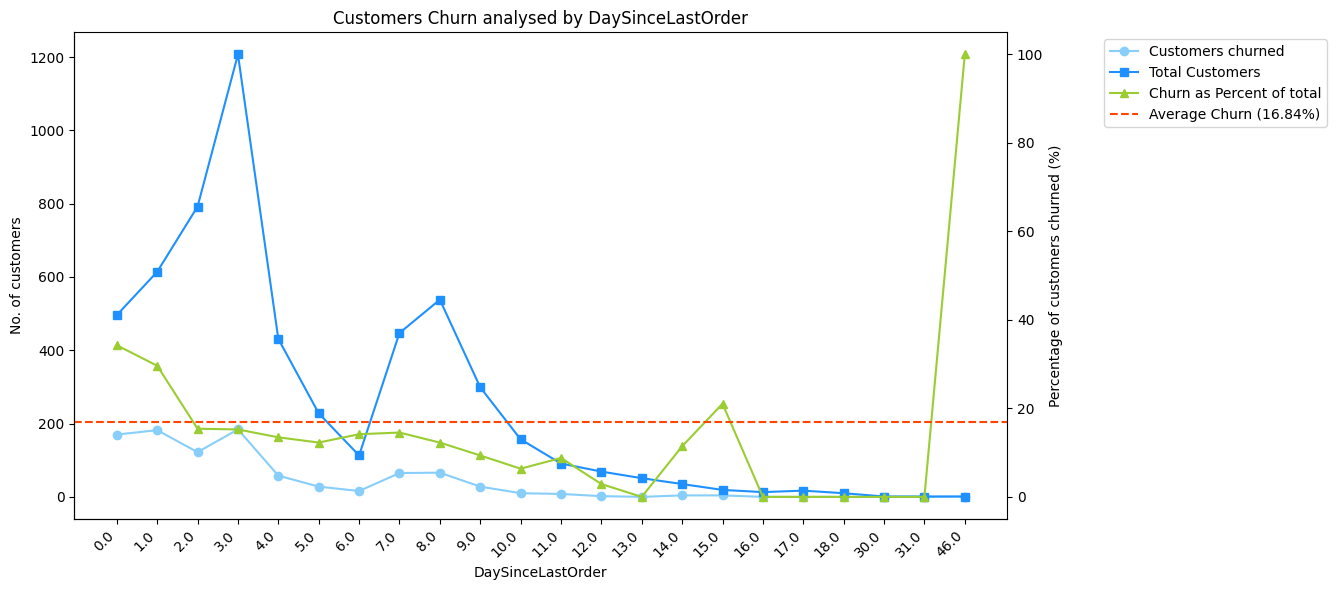

In [57]:
analysis_chart('DaySinceLastOrder')

-> Khách hàng có 0 ngày (vừa đặt hàng) cho thấy tỷ lệ hủy đơn hàng cực kỳ cao (~35%, gấp 1,75 lần trung bình) - hoàn toàn trái ngược với trực giác! Giảm mạnh xuống còn 3-12 ngày, trong đó tỷ lệ hủy đơn hàng ổn định quanh mức 20% hoặc thấp hơn mức cơ sở (13-16%). Tăng nhẹ sau 13 ngày.

=> Ảnh hưởng mạnh đến `churn`

## 5.4. EDA - Bivariate Analysis

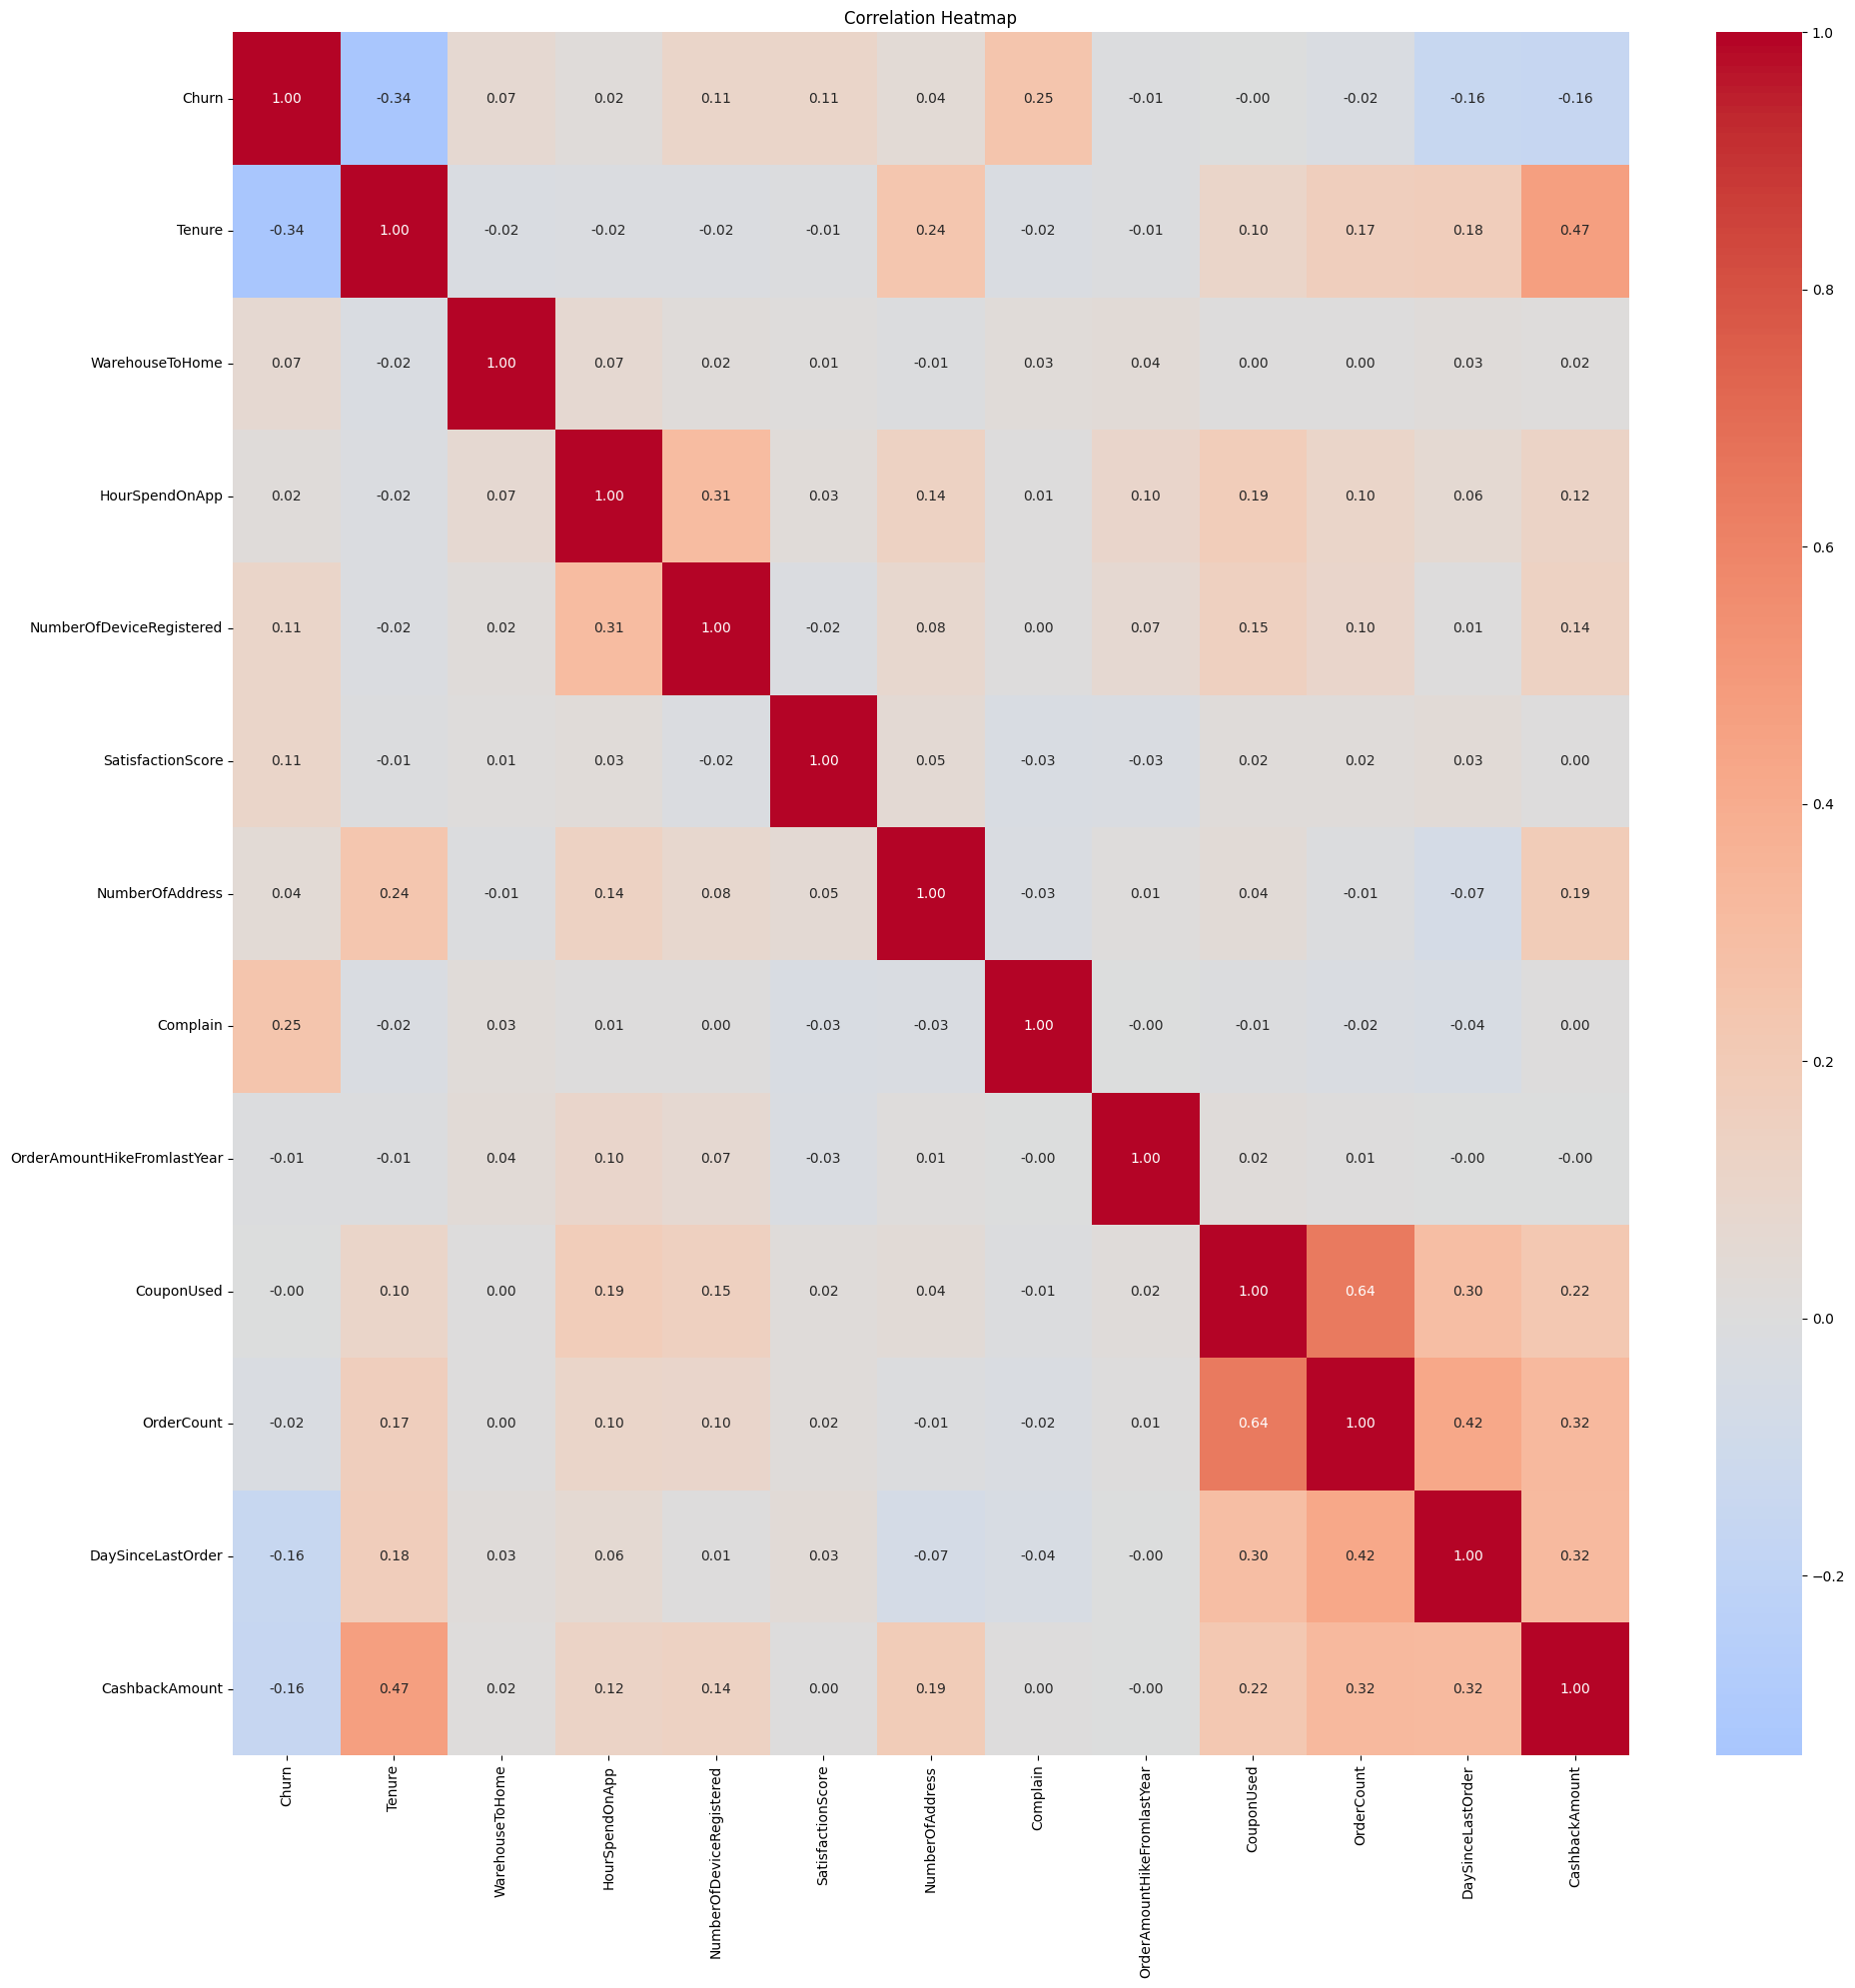

In [58]:
# Create a copy of the dataframe for correlation analysis
df_corr = df.copy()

# Convert Churn to numeric (it was converted to object earlier)
df_corr['Churn'] = df_corr['Churn'].astype('int')

# Select all numeric columns (now including Churn)
df_numeric = df_corr.select_dtypes(include=['number'])

plt.figure(figsize=(20, 20))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 6. Data Preparation

## Quy trình xử lý:

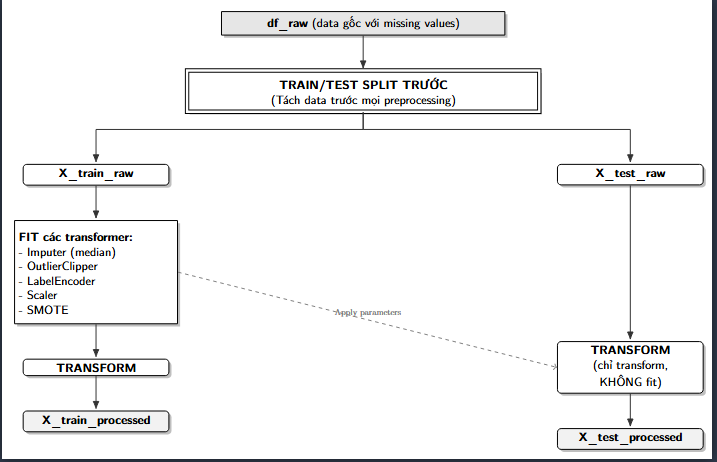


- Tất cả transformers được FIT chỉ trên TRAINING SET
- Test set chỉ được TRANSFORM, không được FIT
- SMOTE chỉ áp dụng trên training set

In [59]:
# BƯỚC 1: CHUẨN BỊ DATA TỪ DF_RAW (data gốc chưa xử lý)

# Reload từ df_raw để đảm bảo không bị data leakage từ EDA
df_model = df_raw.copy()

# Xóa CustomerID (nếu có)
if 'CustomerID' in df_model.columns:
    df_model.drop('CustomerID', axis=1, inplace=True)

# Chuyển đổi CityTier thành object trước khi tạo features
df_model['CityTier'] = df_model['CityTier'].astype('object')

# Tách X, y TRƯỚC KHI làm bất kỳ preprocessing nào
X_raw = df_model.drop('Churn', axis=1)
y = df_model['Churn'].astype(int)

print(f"Dataset shape: {X_raw.shape}")
print(f"Missing values: {X_raw.isnull().sum().sum()}")
print(f"Churn rate: {y.mean():.2%}")

Dataset shape: (5630, 18)
Missing values: 1856
Churn rate: 16.84%


In [60]:
# BƯỚC 2: TRAIN/TEST SPLIT (TRƯỚC MỌI PREPROCESSING)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.30, random_state=42, stratify=y
)

print(f"\n Train set: {X_train_raw.shape[0]} samples ({X_train_raw.shape[0]/len(X_raw)*100:.1f}%)")
print(f" Test set: {X_test_raw.shape[0]} samples ({X_test_raw.shape[0]/len(X_raw)*100:.1f}%)")
print(f"\n  Train Churn rate: {y_train.mean():.2%}")
print(f"  Test Churn rate: {y_test.mean():.2%}")
print(f"\n  Train missing values: {X_train_raw.isnull().sum().sum()}")
print(f"  Test missing values: {X_test_raw.isnull().sum().sum()}")


 Train set: 3941 samples (70.0%)
 Test set: 1689 samples (30.0%)

  Train Churn rate: 16.85%
  Test Churn rate: 16.81%

  Train missing values: 1302
  Test missing values: 554


**-> Split trước khi xử lý missing values/outliers**

In [61]:
# BƯỚC 3: PREPROCESSING - FIT CHỈ TRÊN TRAIN, TRANSFORM CẢ 2

# Xác định các cột
cat_cols = X_train_raw.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns ({len(cat_cols)}): {cat_cols}")
print(f"Numerical columns ({len(num_cols)}): {num_cols}")

# 3.1: IMPUTE MISSING VALUES (fit on train)
print("\n 3.1: Impute Missing Values ")

# 3.1.1: Impute numerical columns với median
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(X_train_raw[num_cols])

# 3.1.2: Impute categorical columns với most_frequent (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
if len(cat_cols) > 0:
    cat_imputer.fit(X_train_raw[cat_cols])

# Transform
X_train_imputed = X_train_raw.copy()
X_test_imputed = X_test_raw.copy()

# Apply numerical imputation
X_train_imputed[num_cols] = num_imputer.transform(X_train_raw[num_cols])
X_test_imputed[num_cols] = num_imputer.transform(X_test_raw[num_cols])

# Apply categorical imputation
if len(cat_cols) > 0:
    X_train_imputed[cat_cols] = cat_imputer.transform(X_train_raw[cat_cols])
    X_test_imputed[cat_cols] = cat_imputer.transform(X_test_raw[cat_cols])
    print(f"   Categorical columns imputed with mode: {cat_cols}")

print(f"   Numerical columns imputed with median: {num_cols}")
print(f"   Train missing after impute: {X_train_imputed.isnull().sum().sum()}")
print(f"   Test missing after impute: {X_test_imputed.isnull().sum().sum()}")
print("   Imputers FIT trên train set, TRANSFORM cả train và test")

# 3.2: CLIP OUTLIERS (fit on train)
print("\n 3.2: Clip Outliers")
cols_to_clip = ['WarehouseToHome', 'Tenure', 'CashbackAmount']
outlier_clipper = OutlierClipper(columns=cols_to_clip)
outlier_clipper.fit(X_train_imputed)

X_train_clipped = outlier_clipper.transform(X_train_imputed)
X_test_clipped = outlier_clipper.transform(X_test_imputed)

for col in cols_to_clip:
    if col in outlier_clipper.bounds_:
        lower, upper = outlier_clipper.bounds_[col]
        print(f"   {col}: bounds = [{lower:.2f}, {upper:.2f}]")
print("   OutlierClipper FIT trên train set, TRANSFORM cả train và test")

# 3.3: FEATURE ENGINEERING
print("\n3.3: Feature Engineering")
feature_engineer = FeatureEngineer()

X_train_fe = feature_engineer.transform(X_train_clipped)
X_test_fe = feature_engineer.transform(X_test_clipped)

# Danh sách features mới
new_features = ['avg_cashbk_per_order', 'order_frequency_mpm', 'coupon_rate', 
                'engagement_score', 'growth_x_freq', 'satis_x_complain', 
                'city_is_tier1', 'multi_address', 'log_OrderCount', 
                'log_CashbackAmount', 'log_WarehouseToHome', 'log_DaySinceLastOrder']

print(f"   Đã tạo {len(new_features)} features mới")
print(f"   Train shape: {X_train_raw.shape} -> {X_train_fe.shape}")
print(f"   Test shape: {X_test_raw.shape} -> {X_test_fe.shape}")

# Kiểm tra NaN/Inf sau feature engineering
train_nan = X_train_fe.isna().sum().sum()
test_nan = X_test_fe.isna().sum().sum()
train_inf = np.isinf(X_train_fe.select_dtypes(include=[np.number])).sum().sum()
test_inf = np.isinf(X_test_fe.select_dtypes(include=[np.number])).sum().sum()

print(f"\n   NaN/Inf check:")
print(f"   - Train NaN: {train_nan}, Inf: {train_inf}")
print(f"   - Test NaN: {test_nan}, Inf: {test_inf}")
if train_nan + test_nan + train_inf + test_inf == 0:
    print("   Không có NaN/Inf sau feature engineering")

# 3.3.1: KIỂM TRA MULTICOLLINEARITY (Warning cho linear models)
print("\n3.3.1: Multicollinearity Check")
numeric_fe = X_train_fe.select_dtypes(include=[np.number])
corr_matrix = numeric_fe.corr().abs()

# Tìm các cặp features có correlation > 0.8
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.8:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print(f"   Tìm thấy {len(high_corr_pairs)} cặp features có correlation > 0.8:")
    for pair in high_corr_pairs[:5]:  # Chỉ hiện 5 cặp đầu
        print(f"      - {pair['Feature 1']} & {pair['Feature 2']}: {pair['Correlation']:.3f}")
    if len(high_corr_pairs) > 5:
        print(f"      ... và {len(high_corr_pairs) - 5} cặp khác")
    print("   Note: Tree-based models (RF, XGBoost) không bị ảnh hưởng bởi multicollinearity")
    print("         Linear models (Logistic, SVM) có thể bị ảnh hưởng nhưng vẫn hoạt động được")
else:
    print("   Không có cặp features nào có correlation > 0.8")

# 3.4: LABEL ENCODING (fit on train) 
print("\n3.4: Label Encoding")
# Cập nhật lại cat_cols sau khi feature engineering
cat_cols_updated = X_train_fe.select_dtypes(include=['object']).columns.tolist()

safe_encoder = SafeLabelEncoder(columns=cat_cols_updated)
safe_encoder.fit(X_train_fe)

X_train_encoded = safe_encoder.transform(X_train_fe)
X_test_encoded = safe_encoder.transform(X_test_fe)

for col in cat_cols_updated:
    n_classes = len(safe_encoder.encoders_[col].classes_)
    print(f"   {col}: {n_classes} classes")

print(f"\nFinal shapes: Train = {X_train_encoded.shape}, Test = {X_test_encoded.shape}")


Categorical columns (6): ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Numerical columns (12): ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

 3.1: Impute Missing Values 
   Categorical columns imputed with mode: ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
   Numerical columns imputed with median: ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
   Train missing after impute: 0
   Test missing after impute: 0
   Imputers FIT trên train set, TRANSFORM cả train và test

 3.2: Clip Outliers
   WarehouseToHome: bou

- LabelEncoder FIT trên train set, TRANSFORM cả train và test
- SafeLabelEncoder xử lý unseen labels trong test set

In [ ]:
# BƯỚC 4: SMOTE CHỈ TRÊN TRAINING SET + VALIDATION SET

# Tạo validation set từ training set (trước SMOTE) để phát hiện overfitting
X_train_pre_smote, X_val_encoded, y_train_pre_smote, y_val = train_test_split(
    X_train_encoded, y_train, test_size=0.15, random_state=42, stratify=y_train
)

print(f"\n VALIDATION SPLIT (để phát hiện SMOTE overfitting):")
print(f"   Train (pre-SMOTE): {len(y_train_pre_smote)} samples")
print(f"   Validation: {len(y_val)} samples (Churn rate: {y_val.mean():.2%})")
print(f"   Validation set KHÔNG được SMOTE - dữ liệu thực tế")

print(f"\n Trước SMOTE:")
print(f"   Train samples: {len(y_train_pre_smote)}")
print(f"   - Churn = 0: {(y_train_pre_smote == 0).sum()} ({(y_train_pre_smote == 0).mean():.2%})")
print(f"   - Churn = 1: {(y_train_pre_smote == 1).sum()} ({(y_train_pre_smote == 1).mean():.2%})")

# SMOTE-Tomek chỉ trên training set (sau khi tách validation)
smt = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train_pre_smote, y_train_pre_smote)

print(f"\n Sau SMOTE:")
print(f"   Train samples: {len(y_train_resampled)}")
print(f"   - Churn = 0: {(y_train_resampled == 0).sum()} ({(y_train_resampled == 0).mean():.2%})")
print(f"   - Churn = 1: {(y_train_resampled == 1).sum()} ({(y_train_resampled == 1).mean():.2%})")

print(f"\n Validation set: {len(y_val)} samples (Churn rate: {y_val.mean():.2%})")
print(f" Test set: {len(y_test)} samples (Churn rate: {y_test.mean():.2%})")
print("\n Note: So sánh Train vs Validation accuracy để phát hiện SMOTE overfitting")


 VALIDATION SPLIT (để phát hiện SMOTE overfitting):
   Train (pre-SMOTE): 3349 samples
   Validation: 592 samples (Churn rate: 16.89%)
   Validation set KHÔNG được SMOTE - dữ liệu thực tế

 Trước SMOTE:
   Train samples: 3349
   - Churn = 0: 2785 (83.16%)
   - Churn = 1: 564 (16.84%)

 Sau SMOTE:
   Train samples: 5558
   - Churn = 0: 2779 (50.00%)
   - Churn = 1: 2779 (50.00%)

 Validation set: 592 samples (Churn rate: 16.89%)
 Test set: 1689 samples (Churn rate: 16.81%)

 Note: So sánh Train vs Validation accuracy để phát hiện SMOTE overfitting

 Sau SMOTE:
   Train samples: 5558
   - Churn = 0: 2779 (50.00%)
   - Churn = 1: 2779 (50.00%)

 Validation set: 592 samples (Churn rate: 16.89%)
 Test set: 1689 samples (Churn rate: 16.81%)

 Note: So sánh Train vs Validation accuracy để phát hiện SMOTE overfitting


**-> Test set phản ánh distribution thực tế của dữ liệu**

**-> Validation set dùng để phát hiện SMOTE overfitting (Train acc >> Val acc là dấu hiệu overfitting)**

# 7. Feature Scaling

- MinMaxScaler được FIT chỉ trên training set (đã resampled)
- TRANSFORM cả training và test set
- Test set **không** được resampled để đánh giá trên dữ liệu thực tế

In [63]:
# BƯỚC 5: FEATURE SCALING (Fit on Train only)

scaler = MinMaxScaler()

# FIT trên train (đã resample), TRANSFORM cả train, validation và test
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val_encoded)  # Validation set KHÔNG resample
X_test_scaled = scaler.transform(X_test_encoded)  # Test set KHÔNG resample

print(f"\n X_train_scaled shape: {X_train_scaled.shape}")
print(f" X_val_scaled shape: {X_val_scaled.shape}")
print(f" X_test_scaled shape: {X_test_scaled.shape}")

print(f"\n Giá trị min-max sau scaling:")
print(f"   Train: min = {X_train_scaled.min():.4f}, max = {X_train_scaled.max():.4f}")
print(f"   Val:   min = {X_val_scaled.min():.4f}, max = {X_val_scaled.max():.4f}")
print(f"   Test:  min = {X_test_scaled.min():.4f}, max = {X_test_scaled.max():.4f}")


 X_train_scaled shape: (5558, 30)
 X_val_scaled shape: (592, 30)
 X_test_scaled shape: (1689, 30)

 Giá trị min-max sau scaling:
   Train: min = 0.0000, max = 1.0000
   Val:   min = 0.0000, max = 1.0000
   Test:  min = -0.2500, max = 1.0769


# 8. Model Training & Evaluation

**Data sử dụng cho training:**
- `X_train_scaled`: Training data đã được xử lý hoàn chỉnh (impute → clip → FE → encode → resample → scale)
- `X_test_scaled`: Test data đã được xử lý (impute → clip → FE → encode → scale) - KHÔNG resample
- `y_train_resampled`: Labels sau SMOTE
- `y_test`: Labels gốc (không thay đổi)

In [64]:
# Định nghĩa các models với random_state để đảm bảo reproducibility

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42, algorithm='SAMME')
}

In [65]:
# Hàm hỗ trợ cho training & evaluation
def train_and_eval(name, model, X_train, X_val, X_test, y_train, y_val, y_test):
    """
    Train model và đánh giá với các metrics quan trọng.
    Thêm validation để phát hiện SMOTE overfitting.
    Returns: dict với các metrics, trained model
    """
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Probabilities (nếu có)
    if hasattr(model, 'predict_proba'):
        y_test_prob = model.predict_proba(X_test)[:, 1]
        y_val_prob = model.predict_proba(X_val)[:, 1]
        roc_auc_test = roc_auc_score(y_test, y_test_prob)
        roc_auc_val = roc_auc_score(y_val, y_val_prob)
    else:
        y_test_prob = None
        roc_auc_test = None
        roc_auc_val = None

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Kiểm tra SMOTE overfitting: Train acc cao hơn Val acc nhiều là dấu hiệu overfitting
    overfit_gap = train_acc - val_acc

    # Metrics
    metrics = {
        'Model': name,
        'Train_Accuracy': train_acc,
        'Val_Accuracy': val_acc,
        'Test_Accuracy': test_acc,
        'Overfit_Gap': overfit_gap,
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1': f1_score(y_test, y_test_pred),
        'ROC_AUC': roc_auc_test
    }

    print(f"\n {name}:")
    print(f"   Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")
    if overfit_gap > 0.10:
        print(f"   ⚠️ Overfit Gap: {overfit_gap:.4f} (Train - Val > 0.10, có thể overfitting trên SMOTE data)")
    else:
        print(f"   ✓ Overfit Gap: {overfit_gap:.4f} (OK)")
    print(f"   Precision: {metrics['Precision']:.4f} | Recall: {metrics['Recall']:.4f} | F1: {metrics['F1']:.4f}")
    if roc_auc_test:
        print(f"   ROC AUC: {metrics['ROC_AUC']:.4f}")

    return metrics, model

# TRAIN VÀ ĐÁNH GIÁ TẤT CẢ MODELS
print("-" * 70)
print(" MODEL TRAINING & EVALUATION")
print("-" * 70)

all_results = []
trained_models = {}

for name, clf in models.items():
    metrics, trained_model = train_and_eval(
        name, clf,
        X_train_scaled, X_val_scaled, X_test_scaled,
        y_train_resampled, y_val, y_test
    )
    all_results.append(metrics)
    trained_models[name] = trained_model

# Tổng hợp kết quả
results_df = pd.DataFrame(all_results).set_index('Model')

print("\n" + "-" * 70)
print(" TỔNG HỢP KẾT QUẢ")
print("-" * 70)
display(results_df.sort_values('ROC_AUC', ascending=False))

----------------------------------------------------------------------
 MODEL TRAINING & EVALUATION
----------------------------------------------------------------------

 Logistic Regression:
   Train Acc: 0.8186 | Val Acc: 0.8243 | Test Acc: 0.7910
   ✓ Overfit Gap: -0.0057 (OK)
   Precision: 0.4300 | Recall: 0.7465 | F1: 0.5457
   ROC AUC: 0.8540

 Support Vector Machine:
   Train Acc: 0.9275 | Val Acc: 0.8885 | Test Acc: 0.8686
   ✓ Overfit Gap: 0.0390 (OK)
   Precision: 0.5812 | Recall: 0.7817 | F1: 0.6667
   ROC AUC: 0.9063

 Decision Tree:
   Train Acc: 1.0000 | Val Acc: 0.9257 | Test Acc: 0.9118
   ✓ Overfit Gap: 0.0743 (OK)
   Precision: 0.7064 | Recall: 0.8134 | F1: 0.7561
   ROC AUC: 0.8725

 Support Vector Machine:
   Train Acc: 0.9275 | Val Acc: 0.8885 | Test Acc: 0.8686
   ✓ Overfit Gap: 0.0390 (OK)
   Precision: 0.5812 | Recall: 0.7817 | F1: 0.6667
   ROC AUC: 0.9063

 Decision Tree:
   Train Acc: 1.0000 | Val Acc: 0.9257 | Test Acc: 0.9118
   ✓ Overfit Gap: 0.0743 (OK)

,Train_Accuracy,Val_Accuracy,Test_Accuracy,Overfit_Gap,Precision,Recall,F1,ROC_AUC
Model,,,,,,,,
XGBoost,1.000000,0.959459,0.963884,0.040541,0.917603,0.862676,0.889292,0.977838
Random Forest,1.000000,0.944257,0.941978,0.055743,0.852273,0.792254,0.821168,0.972063
Support Vector Machine,0.927492,0.888514,0.868561,0.038978,0.581152,0.781690,0.666667,0.906283
AdaBoost,0.888269,0.875000,0.860864,0.013269,0.574018,0.669014,0.617886,0.883769
Decision Tree,1.000000,0.925676,0.911782,0.074324,0.706422,0.813380,0.756137,0.872526
Logistic Regression,0.818640,0.824324,0.791001,-0.005685,0.430020,0.746479,0.545689,0.853990


In [66]:
# Vẽ biểu đồ so sánh accuracy của các models
for col, title in zip(['Train_Accuracy', 'Test_Accuracy'],
                      ['Train Accuracy', 'Test Accuracy']):
    fig = px.bar(
        results_df, x=col, y=results_df.index, color=col,
        title=f"Models vs {title}", text_auto=True, color_continuous_scale='Reds'
    )
    fig.update_layout(title_x=0.5, title_font_size=24,
                      xaxis_title=title, yaxis_title="Models")
    fig.show()

In [67]:
# HYPERPARAMETER TUNING
print("-" * 70)
print(" HYPERPARAMETER TUNING")
print("-" * 70)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Params cho Random Forest & XGBoost
param_rf = {
    "n_estimators": [200, 400],
    "max_depth": [6, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

param_xgb = {
    "n_estimators": [300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0]
}

tuning_jobs = [
    ("Random Forest", RandomForestClassifier(random_state=42), param_rf, "grid", None),
    ("XGBoost", XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42), param_xgb, "random", 20)
]

tuned_models = {}
tuning_results = []

def tune_and_eval(name, model, params, mode="random", n_iter=None):
    """Tune hyperparameters và đánh giá model."""
    print(f"\n{'-'*60}")
    print(f"Tuning {name}...")
    print(f"{'-'*60}")

    if mode == "grid":
        search = GridSearchCV(model, params, scoring="roc_auc", cv=cv, n_jobs=-1, verbose=1)
    else:
        search = RandomizedSearchCV(model, params, n_iter=n_iter, scoring="roc_auc",
                                   cv=cv, n_jobs=-1, random_state=42, verbose=1)

    search.fit(X_train_scaled, y_train_resampled)
    best = search.best_estimator_
    tuned_models[name] = best

    print(f"\n Best CV ROC AUC: {search.best_score_:.4f}")
    print(f" Best Params: {search.best_params_}")

    # Evaluate trên test
    y_pred = best.predict(X_test_scaled)
    y_prob = best.predict_proba(X_test_scaled)[:, 1]

    metrics = {
        "Model": name,
        "CV_ROC_AUC": search.best_score_,
        "Test_ROC_AUC": roc_auc_score(y_test, y_prob),
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }

    print(f"\n Test Results:")
    print(f"   ROC_AUC: {metrics['Test_ROC_AUC']:.4f}")
    print(f"   Accuracy: {metrics['Accuracy']:.4f}")
    print(f"   Precision: {metrics['Precision']:.4f}")
    print(f"   Recall: {metrics['Recall']:.4f}")
    print(f"   F1: {metrics['F1']:.4f}")

    return metrics, best

# Run tuning
for name, model, params, mode, n_iter in tuning_jobs:
    res, best = tune_and_eval(name, model, params, mode, n_iter)
    tuning_results.append(res)

tuning_df = pd.DataFrame(tuning_results).sort_values("Test_ROC_AUC", ascending=False)
print("\n" + "=" * 60)
print("TUNING RESULTS SUMMARY")
print("=" * 60)
display(tuning_df)

----------------------------------------------------------------------
 HYPERPARAMETER TUNING
----------------------------------------------------------------------

------------------------------------------------------------
Tuning Random Forest...
------------------------------------------------------------
Fitting 5 folds for each of 24 candidates, totalling 120 fits

 Best CV ROC AUC: 0.9951
 Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

 Test Results:
   ROC_AUC: 0.9737
   Accuracy: 0.9438
   Precision: 0.8649
   Recall: 0.7887
   F1: 0.8250

------------------------------------------------------------
Tuning XGBoost...
------------------------------------------------------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best CV ROC AUC: 0.9951
 Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

 Test Results:
   ROC_AUC: 0.9737
   Accuracy: 0.9438
   P

,Model,CV_ROC_AUC,Test_ROC_AUC,Accuracy,Precision,Recall,F1
1,XGBoost,0.995944,0.977623,0.960924,0.922481,0.838028,0.878229
0,Random Forest,0.995096,0.973739,0.943754,0.864865,0.788732,0.825046


# 9. Evaluation

----------------------------------------------------------------------
 FINAL MODEL EVALUATION
----------------------------------------------------------------------

 Best model after tuning: XGBoost

 Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

   Not Churn     0.9679    0.9858    0.9767      1405
       Churn     0.9225    0.8380    0.8782       284

    accuracy                         0.9609      1689
   macro avg     0.9452    0.9119    0.9275      1689
weighted avg     0.9602    0.9609    0.9602      1689



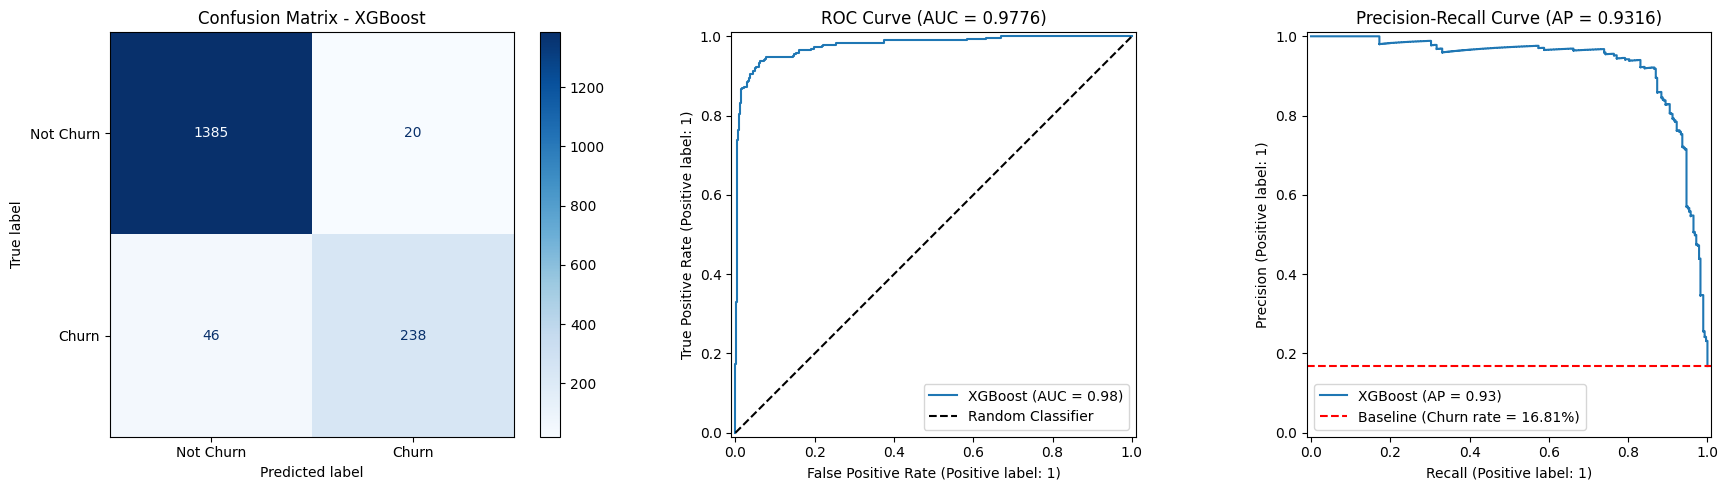


--------------------------------------------------
 FINAL METRICS SUMMARY
--------------------------------------------------
  Accuracy:  0.9609
  Precision: 0.9225
  Recall:    0.8380
  F1 Score:  0.8782
  ROC AUC:   0.9776


In [68]:
# FINAL EVALUATION
print("-" * 70)
print(" FINAL MODEL EVALUATION")
print("-" * 70)

# Chọn model tốt nhất
best_model_name = tuning_df.iloc[0]["Model"]
print(f"\n Best model after tuning: {best_model_name}")

final_model = tuned_models[best_model_name]

y_pred = final_model.predict(X_test_scaled)
y_prob = final_model.predict_proba(X_test_scaled)[:, 1]

# Classification Report
print("\n Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred, digits=4, target_names=['Not Churn', 'Churn']))

# Tạo figure với 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[0], cmap='Blues',
                                        display_labels=['Not Churn', 'Churn'])
axes[0].set_title(f'Confusion Matrix - {best_model_name}')

# 2. ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob, ax=axes[1], name=best_model_name)
axes[1].set_title(f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].legend()

# 3. Precision-Recall Curve
ap = average_precision_score(y_test, y_prob)
PrecisionRecallDisplay.from_predictions(y_test, y_prob, ax=axes[2], name=best_model_name)
axes[2].set_title(f'Precision-Recall Curve (AP = {ap:.4f})')
axes[2].axhline(y=y_test.mean(), color='r', linestyle='--', 
                label=f'Baseline (Churn rate = {y_test.mean():.2%})')
axes[2].legend()

plt.tight_layout()
plt.show()

# Tóm tắt kết quả cuối cùng
print("\n" + "-" * 50)
print(" FINAL METRICS SUMMARY")
print("-" * 50)
print(f"  Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"  F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"  ROC AUC:   {roc_auc_score(y_test, y_prob):.4f}")

------------------------------------------------------------
 FEATURE IMPORTANCE ANALYSIS
------------------------------------------------------------

 Top 15 Features quan trọng nhất:


,Feature,Importance
12,Complain,0.245954
0,Tenure,0.206789
8,PreferedOrderCat,0.037906
9,SatisfactionScore,0.037818
7,NumberOfDeviceRegistered,0.035097
11,NumberOfAddress,0.035071
1,PreferredLoginDevice,0.029458
29,log_DaySinceLastOrder,0.025117
19,order_frequency_mpm,0.023608
14,CouponUsed,0.023484


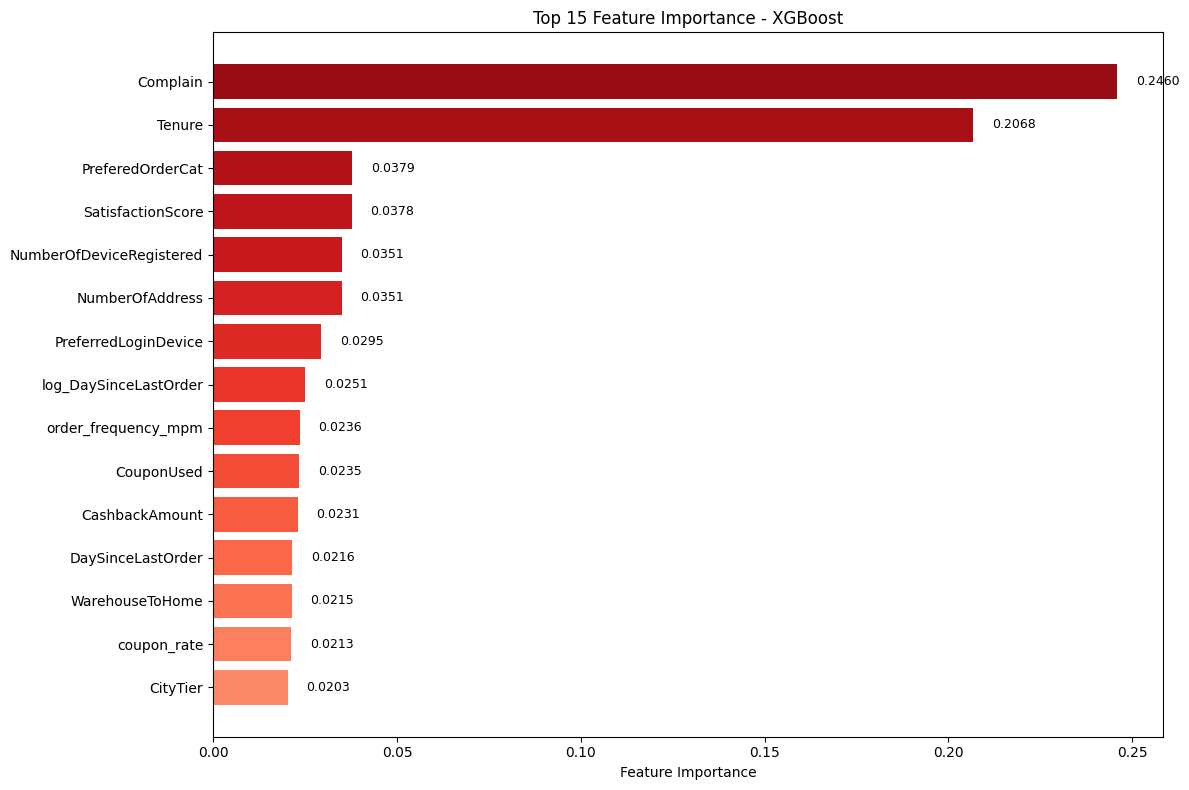


 Feature mới tạo và importance của chúng:


,Feature,Importance
29,log_DaySinceLastOrder,0.025117
19,order_frequency_mpm,0.023608
20,coupon_rate,0.021271
26,log_OrderCount,0.019527
22,growth_x_freq,0.016142
25,multi_address,0.015767
21,engagement_score,0.015144
18,avg_cashbk_per_order,0.012370
23,satis_x_complain,0.012213
27,log_CashbackAmount,0.009156


In [69]:
# FEATURE IMPORTANCE
# Hiển thị top features quan trọng nhất từ model tốt nhất

print("-" * 60)
print(" FEATURE IMPORTANCE ANALYSIS")
print("-" * 60)

# Lấy feature names - sử dụng X_train_encoded vì đó là DataFrame với column names
if isinstance(X_train_encoded, pd.DataFrame):
    feature_names = X_train_encoded.columns.tolist()
else:
    feature_names = [f'feature_{i}' for i in range(X_train_scaled.shape[1])]

# Feature importance từ tuned model
if hasattr(final_model, 'feature_importances_'):
    importances = final_model.feature_importances_

    # Tạo DataFrame và sort
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Hiển thị top 15
    print("\n Top 15 Features quan trọng nhất:")
    display(importance_df.head(15))

    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    top_features = importance_df.head(15)

    colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_features)))[::-1]
    bars = ax.barh(range(len(top_features)), top_features['Importance'], color=colors)
    ax.set_yticks(range(len(top_features)))
    ax.set_yticklabels(top_features['Feature'])
    ax.invert_yaxis()
    ax.set_xlabel('Feature Importance')
    ax.set_title(f'Top 15 Feature Importance - {best_model_name}')

    # Thêm giá trị lên bars
    for bar, val in zip(bars, top_features['Importance']):
        ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
                f'{val:.4f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Highlight các feature mới tạo
    print("\n Feature mới tạo và importance của chúng:")
    new_feat_in_importance = importance_df[importance_df['Feature'].isin(new_features)]
    if len(new_feat_in_importance) > 0:
        display(new_feat_in_importance)
    else:
        print("   Không tìm thấy feature mới trong danh sách")
else:
    print(" Model này không hỗ trợ feature_importances_")

# 10. Conclusion

## Quy trình xử lý

| Bước | Mô tả | Data Leakage Prevention |
|------|-------|-------------------------|
| 1 | Train/Test/Val Split | Split TRƯỚC mọi preprocessing |
| 2 | Missing Values | Imputer FIT trên train only (cả numerical & categorical) |
| 3 | Outliers | OutlierClipper FIT trên train only |
| 4 | Feature Engineering | Xử lý division by zero và NaN/Inf check |
| 5 | Multicollinearity Check | Cảnh báo các cặp features có correlation cao |
| 6 | Label Encoding | SafeLabelEncoder FIT trên train only |
| 7 | Resampling (SMOTE) | CHỈ áp dụng trên train set (sau khi tách validation) |
| 8 | Scaling | Scaler FIT trên train only |

## Các yếu tố ảnh hưởng mạnh đến Customer Churn

1. **Tenure (Thời gian gắn bó)**: Khách hàng mới (0-1 tháng) có tỷ lệ churn cao nhất (~50-55%)
2. **Complain (Khiếu nại)**: Khách có khiếu nại có khả năng churn cao gấp ~1.5 lần
3. **NumberOfAddress**: Khách có 2-3 địa chỉ có tỷ lệ churn rất cao (~50%)
4. **DaySinceLastOrder**: Khách vừa đặt hàng (0 ngày) lại có tỷ lệ churn cao - có thể do hủy đơn
5. **PreferedOrderCat**: Khách mua Laptop/Điện tử có rủi ro cao hơn; khách mua Grocery trung thành nhất

## Model Performance

- **Best Model**: XGBoost (sau hyperparameter tuning)
- **Quy trình ML chuẩn**: Tất cả preprocessing được fit CHỈ trên training set
- **Validation set**: Phát hiện SMOTE overfitting thông qua Train-Val accuracy gap
- **Kết quả đáng tin cậy**: Không bị inflate do data leakage

## Recommendations cho Business

1. **Chú ý đặc biệt đến khách hàng mới** trong 1-3 tháng đầu
2. **Xử lý khiếu nại nhanh chóng** để giảm churn  
3. **Theo dõi khách hàng có nhiều địa chỉ giao hàng** - có thể là dấu hiệu chuyển nhà hoặc không hài lòng
4. **Chiến lược riêng cho khách mua điện tử** - có thể là đợi khuyến mãi rồi rời bỏ